In [ ]:
# warning off
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/데이터마이닝/project/Regression

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/17o6jvvxiH4if_8_Mu7VfzkiGdgm_AKLa/데이터마이닝/project/Regression


In [ ]:
# Pyplot setting
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.rcParams["figure.figsize"] = (14,10)

#1. 데이터 불러오기 & 전처리

In [ ]:
# 독립변수 로드
import pandas as pd
X = pd.read_csv('./stations_05_26_5.csv')
X = X.drop(columns=['Unnamed: 0', '보관소(대여소)명', '위도', '경도', 'X좌표', 'Y좌표', '0~4세', '5~9세', '10~14세', '60~64세', '65~69세', '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상+'])
X = X.dropna()
X

,대여소 번호,계,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,주거지역500,주거지역최단,상업지역500,상업지역최단,업무시설500,업무시설최단,지하철500,지하철최단,버스500,버스최단,버스이용량2019,버스이용량2020,공원500,공원최단,학교500,학교최단,생활시설500,생활시설최단
0,301,9813.0,350.0,506.0,759.0,788.0,743.0,763.0,811.0,838.0,756.0,13,183.821912,12,173.418145,8,52.427792,1,0.231184,25,0.008699,16067441.0,11737500.0,8,182.795981,0,0.514243,7,86.411218
1,302,9813.0,350.0,506.0,759.0,788.0,743.0,763.0,811.0,838.0,756.0,4,399.756278,13,268.001124,16,184.916835,2,0.060218,19,0.195371,18342579.0,13155994.0,8,39.762685,1,0.463458,8,32.676602
2,303,9813.0,350.0,506.0,759.0,788.0,743.0,763.0,811.0,838.0,756.0,7,133.552262,14,32.404363,12,55.584170,2,0.228540,24,0.131703,24120964.0,17334933.0,9,79.751812,1,0.179313,14,55.167181
3,304,8449.0,172.0,477.0,678.0,603.0,572.0,592.0,672.0,683.0,828.0,2,389.749655,10,116.297961,18,72.965463,3,0.124417,22,0.042636,22281021.0,16370362.0,8,110.438310,1,0.382449,13,134.744423
4,305,8449.0,172.0,477.0,678.0,603.0,572.0,592.0,672.0,683.0,828.0,2,470.384247,10,102.263389,19,145.683283,1,0.214424,24,0.128725,23050574.0,16903736.0,5,43.631970,1,0.472848,15,96.666152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,1085,26123.0,1327.0,1579.0,1643.0,1861.0,2259.0,1999.0,2226.0,2125.0,1926.0,11,89.236124,0,630.186888,0,726.516365,1,0.299339,28,0.058136,6728992.0,5192066.0,9,163.514198,6,0.171621,32,202.632461
2043,1086,26123.0,1327.0,1579.0,1643.0,1861.0,2259.0,1999.0,2226.0,2125.0,1926.0,7,76.462995,0,892.250212,0,606.603510,2,0.169889,30,0.092717,7903627.0,6050832.0,4,274.295913,6,0.272033,30,48.823204
2044,1088,20309.0,934.0,1172.0,1607.0,1560.0,1778.0,1679.0,1677.0,1589.0,1461.0,3,342.617381,0,1500.000000,1,486.550769,1,0.184915,21,0.042557,5482882.0,4528257.0,1,264.828400,4,0.310536,15,83.319796
2045,1089,25500.0,1377.0,1195.0,1213.0,1268.0,2134.0,2868.0,2542.0,1798.0,1642.0,4,165.049074,0,722.363379,0,775.498172,0,0.688582,14,0.178564,1935652.0,1364800.0,4,93.257678,2,0.212230,18,130.014330


In [ ]:
# 종속변수 로드
import pandas as pd
Yfiles = [
      '2019년 전 기간 대여소 정리.csv',
      '2020년 전 기간 대여소 정리.csv',
      '2019년 출근 시간 대여소 정리.csv',
      '2020_7to10.csv',
      '2019년 퇴근 시간 대여소 정리.csv',
      '2020_17to20.csv',
]
Xs = []
Ys = []
for idx, Yfile in enumerate(Yfiles):
  Y = pd.read_csv('./data/' + Yfile)
  Y = Y[['station', 'degree_centrality']]
  XY = pd.merge(left=X, right=Y, how='left', left_on='대여소 번호',  right_on='station')
  XY = XY.dropna()
  Xs.append(XY.drop(columns=['대여소 번호', 'station', '버스이용량{}'.format(2020 if idx%2==0 else 2019), 'degree_centrality']))
  Ys.append(XY[['degree_centrality']])

In [ ]:
# OLS summary
import statsmodels.api as sm
from IPython.display import display
for idx, Yfile in enumerate(Yfiles):
  ols = sm.OLS(Ys[idx], Xs[idx])
  ols = ols.fit()
  print('\n\n====================' + Yfile + '====================\n\n')
  display(ols.summary())



====================2019년 전 기간 대여소 정리.csv====================




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      degree_centrality   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              340.7
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        03:44:45   Log-Likelihood:                          1155.5
No. Observations:                1509   AIC:                                     -2257.
Df Residuals:                    1482   BIC:                                     -2113.
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
계          -3.026e-06   4.16e-06     -0.727      0.467   -1.12e-05    5.13e-06
15~19세     -5.362e-05   2.59e-05     -2.074      0.038      -0.000   -2.91e-06
20~24세      5.677e-05   1.38e-05      4.103      0.000    2.96e-05    8.39e-05
25~29세     -5.444e-05   1.68e-05     -3.237      0.001   -8.74e-05   -2.14e-05
30~34세        4.7e-05   2.64e-05      1.777      0.076   -4.88e-06    9.89e-05
35~39세      3.969e-05   3.31e-05      1.200      0.230   -2.52e-05       0.000
40~44세     -2.559e-05   3.59e-05     -0.713      0.476    -9.6e-05    4.48e-05
45~49세      1.075e-05   3.36e-05      0.320      0.749   -5.51e-05    7.66e-05
50~54세         0.0001   3.69e-05      2.795      0.005    3.08e-05       0.000
55~59세     -8.493e-05   2.87e-05     -2.963      0.003      -0.000   -2.87e-05
주거지역500        0.0028      0.001      5.558      0.000       0.002       0.004
주거지역최단      5.844e-05   2.35e-05      2.490      0.013    1.24e-05       0.000
상업지역500        0.0044      0.002      2.442      0.015       0.001       0.008
상업지역최단      4.224e-05   8.04e-06      5.255      0.000    2.65e-05     5.8e-05
업무시설500        0.0022      0.001      3.116      0.002       0.001       0.004
업무시설최단     -1.019e-05   1.03e-05     -0.991      0.322   -3.04e-05    9.98e-06
지하철500         0.0240      0.003      7.197      0.000       0.017       0.030
지하철최단         -0.0334      0.010     -3.457      0.001      -0.052      -0.014
버스500          0.0004      0.000      1.323      0.186      -0.000       0.001
버스최단           0.1334      0.051      2.639      0.008       0.034       0.233
버스이용량2019   3.078e-09      6e-10      5.129      0.000     1.9e-09    4.26e-09
공원500          0.0036      0.002      2.149      0.032       0.000       0.007
공원최단       -6.951e-06   1.74e-05     -0.399      0.690   -4.12e-05    2.73e-05
학교500          0.0060      0.002      3.464      0.001       0.003       0.009
학교최단           0.1948      0.021      9.303      0.000       0.154       0.236
생활시설500       -0.0003      0.000     -0.702      0.483      -0.001       0.000
생활시설최단         0.0001   3.33e-05      3.167      0.002    4.02e-05       0.000
==============================================================================
Omnibus:                      250.638   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.845
Skew:                           0.968   Prob(JB):                    1.31e-113
Kurtosis:                       5.125   Cond. No.                     2.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.



====================2020년 전 기간 대여소 정리.csv====================




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      degree_centrality   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              334.6
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        03:44:45   Log-Likelihood:                          1753.3
No. Observations:                2030   AIC:                                     -3453.
Df Residuals:                    2003   BIC:                                     -3301.
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
계          -2.079e-06   3.25e-06     -0.640      0.522   -8.45e-06    4.29e-06
15~19세     -4.992e-05   1.97e-05     -2.533      0.011   -8.86e-05   -1.13e-05
20~24세      4.215e-05   1.03e-05      4.080      0.000    2.19e-05    6.24e-05
25~29세     -4.862e-05    1.3e-05     -3.741      0.000   -7.41e-05   -2.31e-05
30~34세      4.261e-05   2.06e-05      2.066      0.039    2.16e-06     8.3e-05
35~39세      2.831e-05   2.56e-05      1.105      0.269   -2.19e-05    7.86e-05
40~44세      -2.16e-05   2.79e-05     -0.774      0.439   -7.63e-05    3.31e-05
45~49세      6.313e-06   2.61e-05      0.242      0.809   -4.49e-05    5.75e-05
50~54세      9.994e-05   2.92e-05      3.424      0.001    4.27e-05       0.000
55~59세     -7.135e-05   2.25e-05     -3.171      0.002      -0.000   -2.72e-05
주거지역500        0.0022      0.000      5.456      0.000       0.001       0.003
주거지역최단      5.371e-05   1.79e-05      3.002      0.003    1.86e-05    8.88e-05
상업지역500        0.0037      0.001      2.649      0.008       0.001       0.006
상업지역최단      3.495e-05   6.18e-06      5.654      0.000    2.28e-05    4.71e-05
업무시설500        0.0021      0.001      3.600      0.000       0.001       0.003
업무시설최단     -3.924e-06   8.05e-06     -0.487      0.626   -1.97e-05    1.19e-05
지하철500         0.0152      0.003      6.082      0.000       0.010       0.020
지하철최단         -0.0324      0.008     -4.303      0.000      -0.047      -0.018
버스500          0.0005      0.000      1.777      0.076   -4.93e-05       0.001
버스최단           0.1318      0.039      3.406      0.001       0.056       0.208
버스이용량2020   3.606e-09   6.31e-10      5.718      0.000    2.37e-09    4.84e-09
공원500          0.0049      0.001      3.730      0.000       0.002       0.007
공원최단        6.031e-07   1.35e-05      0.045      0.964   -2.59e-05    2.71e-05
학교500          0.0027      0.001      2.065      0.039       0.000       0.005
학교최단           0.1295      0.016      8.157      0.000       0.098       0.161
생활시설500       -0.0004      0.000     -1.451      0.147      -0.001       0.000
생활시설최단      9.091e-07   2.41e-05      0.038      0.970   -4.63e-05    4.81e-05
==============================================================================
Omnibus:                      404.302   Durbin-Watson:                   1.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1016.458
Skew:                           1.074   Prob(JB):                    1.90e-221
Kurtosis:                       5.721   Cond. No.                     1.52e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.



====================2019년 출근 시간 대여소 정리.csv====================




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      degree_centrality   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              312.2
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        03:44:45   Log-Likelihood:                          2817.9
No. Observations:                1507   AIC:                                     -5582.
Df Residuals:                    1480   BIC:                                     -5438.
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
계          -2.066e-06   1.38e-06     -1.497      0.135   -4.77e-06    6.41e-07
15~19세      2.174e-06   8.57e-06      0.254      0.800   -1.46e-05     1.9e-05
20~24세      1.672e-05   4.59e-06      3.642      0.000    7.72e-06    2.57e-05
25~29세     -1.225e-05   5.58e-06     -2.196      0.028   -2.32e-05   -1.31e-06
30~34세      6.677e-06   8.77e-06      0.761      0.447   -1.05e-05    2.39e-05
35~39세      2.931e-05    1.1e-05      2.671      0.008    7.79e-06    5.08e-05
40~44세     -2.391e-05   1.19e-05     -2.009      0.045   -4.73e-05    -5.7e-07
45~49세      1.878e-05   1.11e-05      1.688      0.092   -3.05e-06    4.06e-05
50~54세     -1.623e-07   1.22e-05     -0.013      0.989   -2.42e-05    2.39e-05
55~59세     -1.001e-06   9.51e-06     -0.105      0.916   -1.96e-05    1.76e-05
주거지역500        0.0008      0.000      4.966      0.000       0.001       0.001
주거지역최단       3.03e-05   7.78e-06      3.895      0.000     1.5e-05    4.56e-05
상업지역500        0.0015      0.001      2.601      0.009       0.000       0.003
상업지역최단      1.105e-05   2.67e-06      4.145      0.000    5.82e-06    1.63e-05
업무시설500        0.0013      0.000      5.524      0.000       0.001       0.002
업무시설최단     -6.573e-06   3.41e-06     -1.928      0.054   -1.33e-05    1.14e-07
지하철500         0.0068      0.001      6.164      0.000       0.005       0.009
지하철최단         -0.0063      0.003     -1.954      0.051      -0.013    2.37e-05
버스500          0.0001      0.000      1.040      0.299      -0.000       0.000
버스최단           0.0384      0.017      2.287      0.022       0.005       0.071
버스이용량2019    8.73e-10   1.99e-10      4.388      0.000    4.83e-10    1.26e-09
공원500          0.0011      0.001      1.993      0.046    1.78e-05       0.002
공원최단       -4.217e-06   5.78e-06     -0.729      0.466   -1.56e-05    7.12e-06
학교500          0.0018      0.001      3.131      0.002       0.001       0.003
학교최단           0.0538      0.007      7.742      0.000       0.040       0.067
생활시설500        0.0001      0.000      0.800      0.424      -0.000       0.000
생활시설최단      2.834e-05    1.1e-05      2.565      0.010    6.67e-06       5e-05
==============================================================================
Omnibus:                      321.787   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              851.029
Skew:                           1.119   Prob(JB):                    1.59e-185
Kurtosis:                       5.923   Cond. No.                     2.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.



====================2020_7to10.csv====================




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      degree_centrality   R-squared (uncentered):                   0.801
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                              297.3
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        03:44:45   Log-Likelihood:                          3934.3
No. Observations:                2027   AIC:                                     -7815.
Df Residuals:                    2000   BIC:                                     -7663.
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
계          -1.746e-06   1.11e-06     -1.579      0.115   -3.92e-06    4.23e-07
15~19세       5.98e-06   6.71e-06      0.891      0.373   -7.19e-06    1.91e-05
20~24세      1.172e-05   3.52e-06      3.330      0.001    4.82e-06    1.86e-05
25~29세     -1.146e-05   4.43e-06     -2.588      0.010   -2.01e-05   -2.77e-06
30~34세      8.937e-06   7.03e-06      1.272      0.203   -4.84e-06    2.27e-05
35~39세      2.161e-05   8.73e-06      2.476      0.013    4.49e-06    3.87e-05
40~44세     -1.875e-05   9.51e-06     -1.972      0.049   -3.74e-05   -9.96e-08
45~49세       1.33e-05    8.9e-06      1.494      0.135   -4.16e-06    3.08e-05
50~54세     -6.239e-07   9.94e-06     -0.063      0.950   -2.01e-05    1.89e-05
55~59세       3.11e-06   7.66e-06      0.406      0.685   -1.19e-05    1.81e-05
주거지역500        0.0006      0.000      4.486      0.000       0.000       0.001
주거지역최단      2.851e-05   6.14e-06      4.644      0.000    1.65e-05    4.05e-05
상업지역500        0.0014      0.000      2.873      0.004       0.000       0.002
상업지역최단      1.001e-05   2.11e-06      4.753      0.000    5.88e-06    1.41e-05
업무시설500        0.0011      0.000      5.856      0.000       0.001       0.002
업무시설최단     -3.079e-06   2.74e-06     -1.122      0.262   -8.46e-06     2.3e-06
지하철500         0.0037      0.001      4.327      0.000       0.002       0.005
지하철최단         -0.0094      0.003     -3.649      0.000      -0.014      -0.004
버스500          0.0001   9.12e-05      1.367      0.172   -5.41e-05       0.000
버스최단           0.0413      0.013      3.125      0.002       0.015       0.067
버스이용량2020   1.127e-09   2.15e-10      5.248      0.000    7.06e-10    1.55e-09
공원500          0.0012      0.000      2.728      0.006       0.000       0.002
공원최단       -3.246e-06   4.62e-06     -0.703      0.482   -1.23e-05    5.81e-06
학교500          0.0007      0.000      1.652      0.099      -0.000       0.002
학교최단           0.0356      0.005      6.546      0.000       0.025       0.046
생활시설500        0.0001   9.94e-05      1.294      0.196   -6.64e-05       0.000
생활시설최단     -8.968e-07   8.24e-06     -0.109      0.913   -1.71e-05    1.53e-05
==============================================================================
Omnibus:                      463.529   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1478.665
Skew:                           1.137   Prob(JB):                         0.00
Kurtosis:                       6.513   Cond. No.                     1.52e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.



====================2019년 퇴근 시간 대여소 정리.csv====================




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      degree_centrality   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              129.1
Date:                Fri, 28 May 2021   Prob (F-statistic):                   6.38e-212
Time:                        03:44:45   Log-Likelihood:                          618.26
No. Observations:                 551   AIC:                                     -1183.
Df Residuals:                     524   BIC:                                     -1066.
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
계          -5.432e-06   5.85e-06     -0.929      0.354   -1.69e-05    6.06e-06
15~19세      1.304e-06   3.86e-05      0.034      0.973   -7.46e-05    7.72e-05
20~24세      3.939e-05   1.73e-05      2.274      0.023    5.36e-06    7.34e-05
25~29세     -3.961e-05   2.03e-05     -1.949      0.052   -7.95e-05    3.22e-07
30~34세      2.648e-05   3.13e-05      0.847      0.397   -3.49e-05    8.79e-05
35~39세      9.167e-05   4.28e-05      2.144      0.033    7.66e-06       0.000
40~44세     -4.636e-05   4.64e-05     -0.998      0.319      -0.000    4.49e-05
45~49세      -4.14e-05   4.38e-05     -0.945      0.345      -0.000    4.46e-05
50~54세         0.0001   4.39e-05      3.080      0.002    4.89e-05       0.000
55~59세     -8.276e-05   3.92e-05     -2.111      0.035      -0.000   -5.75e-06
주거지역500       -0.0004      0.001     -0.684      0.494      -0.002       0.001
주거지역최단        5.8e-05   2.93e-05      1.978      0.048    3.92e-07       0.000
상업지역500        0.0003      0.002      0.168      0.867      -0.003       0.004
상업지역최단      3.942e-05   1.11e-05      3.566      0.000    1.77e-05    6.11e-05
업무시설500        0.0014      0.001      1.920      0.055   -3.31e-05       0.003
업무시설최단      4.105e-05   1.42e-05      2.890      0.004    1.31e-05    6.89e-05
지하철500         0.0137      0.004      3.748      0.000       0.007       0.021
지하철최단         -0.0754      0.014     -5.473      0.000      -0.103      -0.048
버스500          0.0006      0.000      1.302      0.193      -0.000       0.001
버스최단           0.1260      0.062      2.030      0.043       0.004       0.248
버스이용량2019   1.865e-09   7.36e-10      2.533      0.012    4.19e-10    3.31e-09
공원500          0.0078      0.002      3.715      0.000       0.004       0.012
공원최단        2.516e-05   2.11e-05      1.195      0.233   -1.62e-05    6.65e-05
학교500          0.0039      0.002      1.860      0.064      -0.000       0.008
학교최단           0.1126      0.024      4.613      0.000       0.065       0.161
생활시설500       -0.0003      0.001     -0.496      0.620      -0.001       0.001
생활시설최단      9.991e-05   4.02e-05      2.485      0.013    2.09e-05       0.000
==============================================================================
Omnibus:                       93.131   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.738
Skew:                           0.923   Prob(JB):                     1.15e-43
Kurtosis:                       5.282   Cond. No.                     2.41e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.



====================2020_17to20.csv====================




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      degree_centrality   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.780
Method:                 Least Squares   F-statistic:                              266.9
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        03:44:46   Log-Likelihood:                          2478.6
No. Observations:                2029   AIC:                                     -4903.
Df Residuals:                    2002   BIC:                                     -4752.
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
계          -2.467e-06   2.27e-06     -1.086      0.277   -6.92e-06    1.99e-06
15~19세     -7.547e-06   1.38e-05     -0.548      0.584   -3.46e-05    1.95e-05
20~24세        2.5e-05   7.22e-06      3.461      0.001    1.08e-05    3.92e-05
25~29세     -3.022e-05   9.09e-06     -3.326      0.001    -4.8e-05   -1.24e-05
30~34세      2.762e-05   1.44e-05      1.915      0.056   -6.58e-07    5.59e-05
35~39세      3.031e-05   1.79e-05      1.692      0.091   -4.82e-06    6.54e-05
40~44세     -2.171e-05   1.95e-05     -1.113      0.266      -6e-05    1.66e-05
45~49세      1.039e-05   1.83e-05      0.569      0.569   -2.54e-05    4.62e-05
50~54세      3.456e-05   2.04e-05      1.694      0.091   -5.46e-06    7.46e-05
55~59세     -2.207e-05   1.57e-05     -1.403      0.161   -5.29e-05    8.78e-06
주거지역500        0.0012      0.000      4.424      0.000       0.001       0.002
주거지역최단      4.211e-05   1.25e-05      3.366      0.001    1.76e-05    6.67e-05
상업지역500        0.0024      0.001      2.474      0.013       0.001       0.004
상업지역최단      2.058e-05   4.32e-06      4.762      0.000    1.21e-05    2.91e-05
업무시설500        0.0014      0.000      3.602      0.000       0.001       0.002
업무시설최단      -5.16e-06   5.63e-06     -0.916      0.360   -1.62e-05    5.88e-06
지하철500         0.0091      0.002      5.212      0.000       0.006       0.013
지하철최단         -0.0245      0.005     -4.644      0.000      -0.035      -0.014
버스500          0.0002      0.000      1.251      0.211      -0.000       0.001
버스최단           0.0796      0.027      2.943      0.003       0.027       0.133
버스이용량2020   2.572e-09   4.41e-10      5.834      0.000    1.71e-09    3.44e-09
공원500          0.0030      0.001      3.336      0.001       0.001       0.005
공원최단       -3.253e-06   9.44e-06     -0.344      0.731   -2.18e-05    1.53e-05
학교500          0.0014      0.001      1.540      0.124      -0.000       0.003
학교최단           0.0826      0.011      7.445      0.000       0.061       0.104
생활시설500       -0.0002      0.000     -0.755      0.450      -0.001       0.000
생활시설최단      -9.62e-06   1.68e-05     -0.572      0.568   -4.26e-05    2.34e-05
==============================================================================
Omnibus:                      548.072   Durbin-Watson:                   1.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1981.740
Skew:                           1.299   Prob(JB):                         0.00
Kurtosis:                       7.086   Cond. No.                     1.52e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.

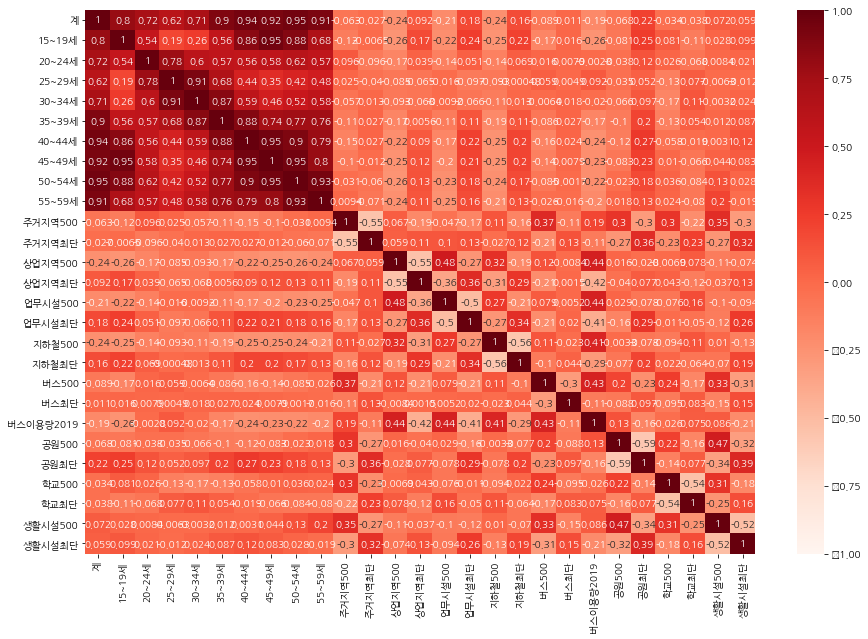

In [ ]:
# heat map
import seaborn as sb
plt.rcParams['figure.figsize']=(15,10)

sb.heatmap(Xs[0].corr(),
          annot=True,
          cmap='Reds',
          vmin = -1, vmax = 1
          )

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
corr = Xs[0].corr()
vif["VIF Factor"] = [variance_inflation_factor(corr.values, i) for i in range(corr.shape[1])]
vif["features"] = Xs[0].columns
vif

,VIF Factor,features
0,433814.198329,계
1,17199.342754,15~19세
2,11025.923060,20~24세
3,34972.647184,25~29세
4,89229.403040,30~34세
5,177036.628740,35~39세
6,282642.815541,40~44세
7,253582.851150,45~49세
8,189725.508301,50~54세
9,83455.470886,55~59세


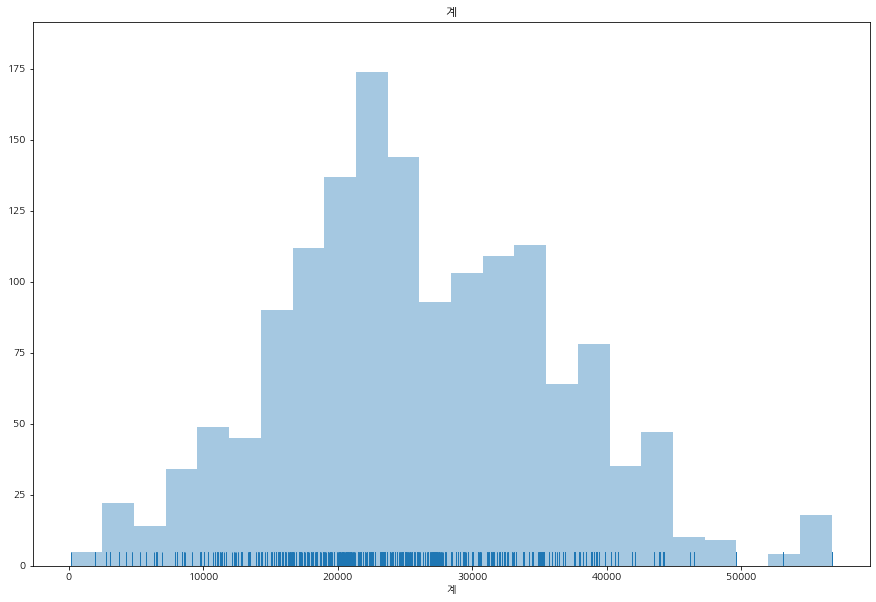

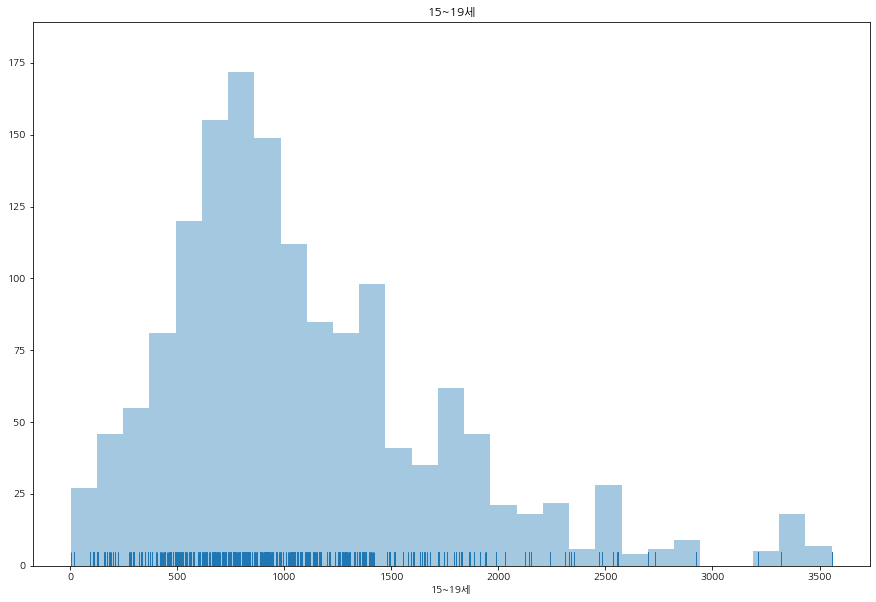

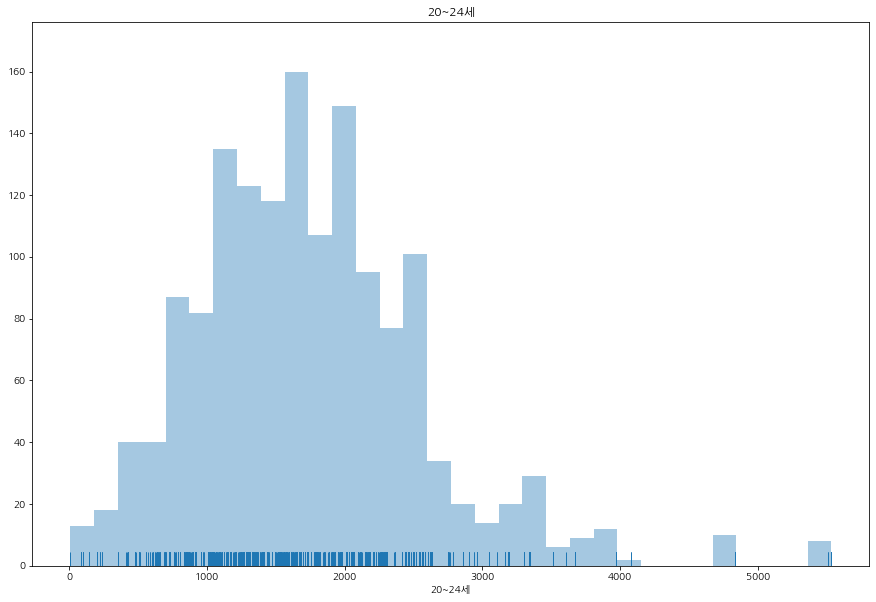

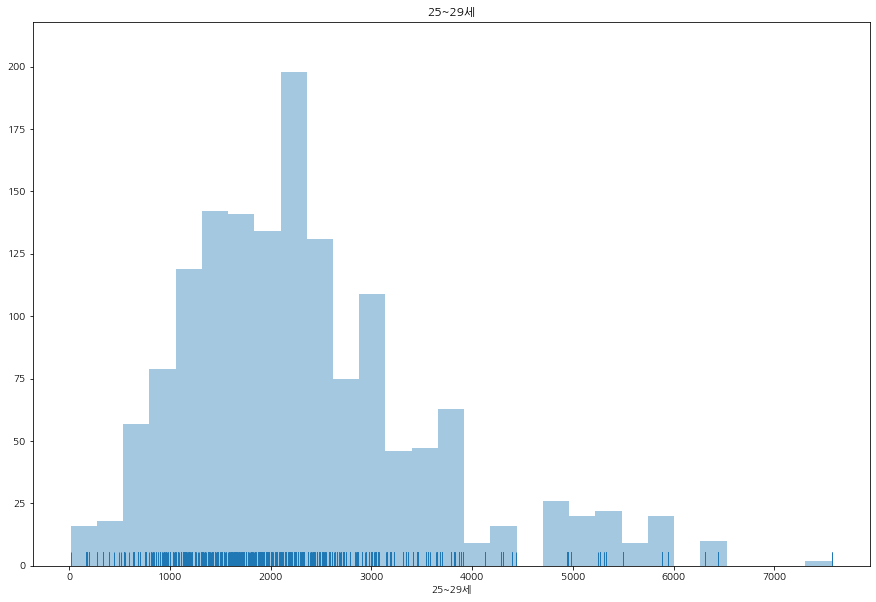

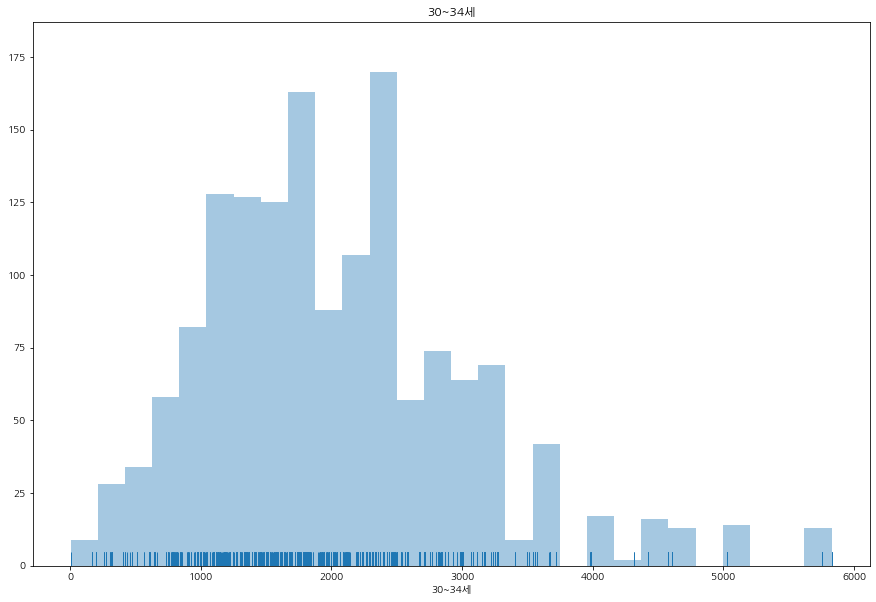

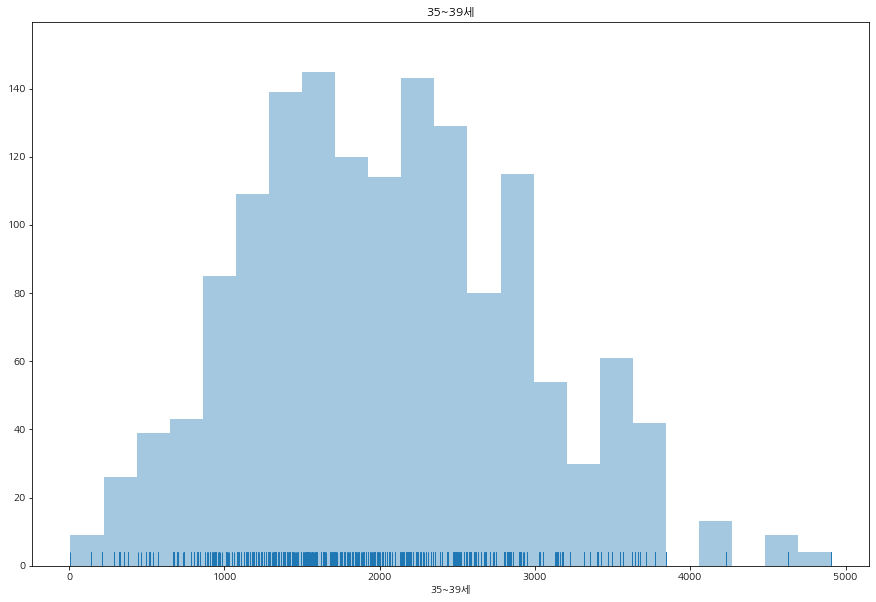

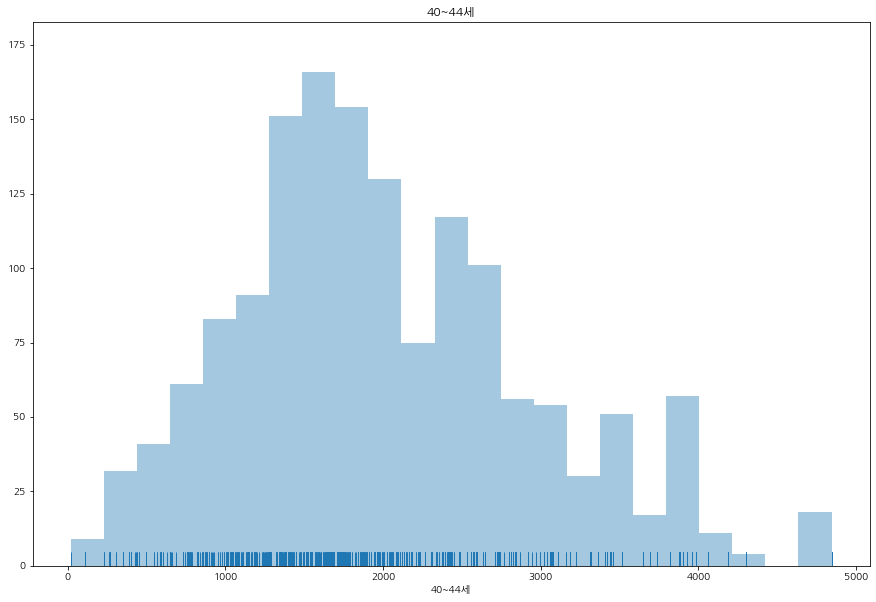

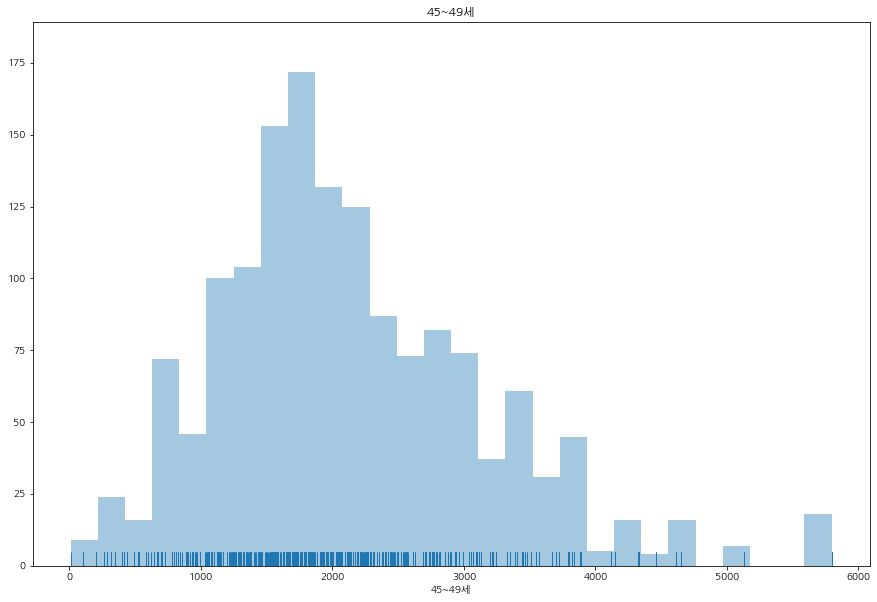

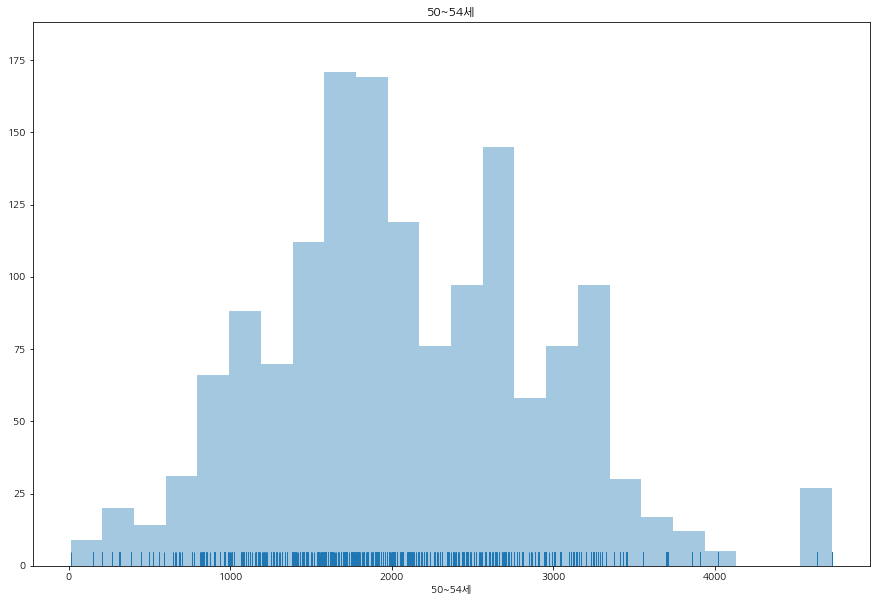

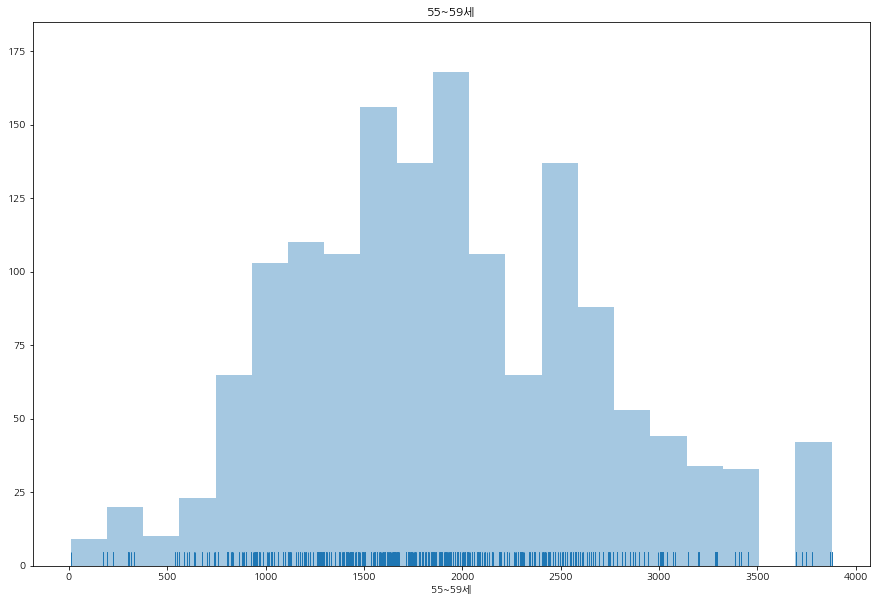

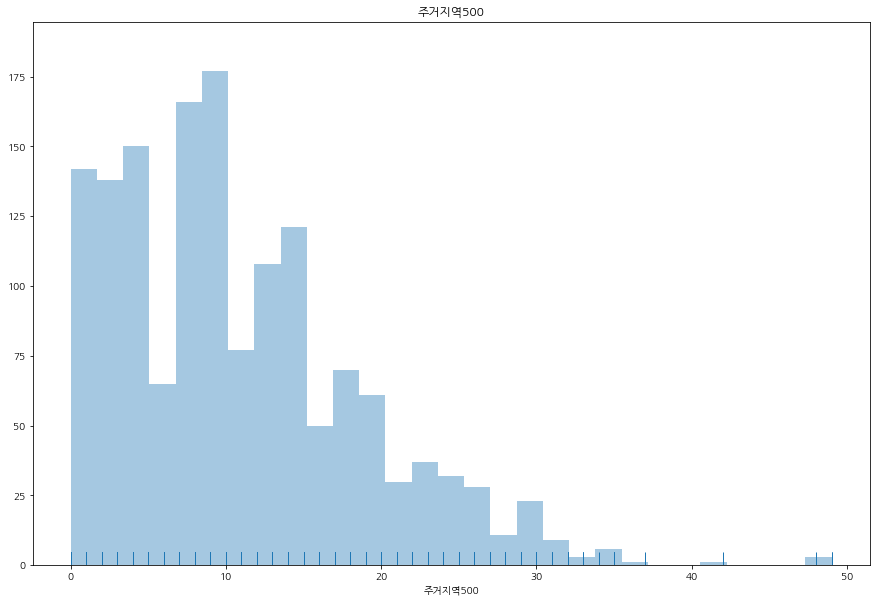

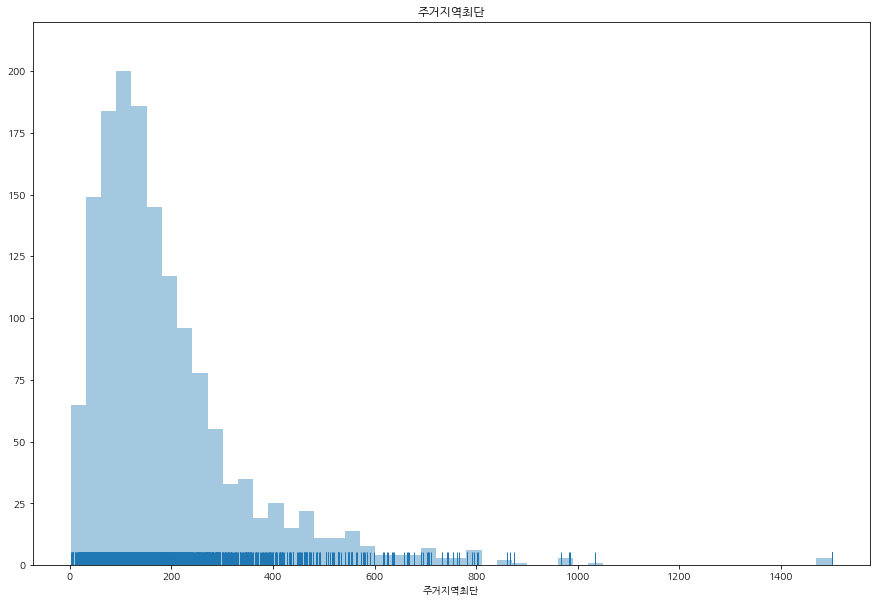

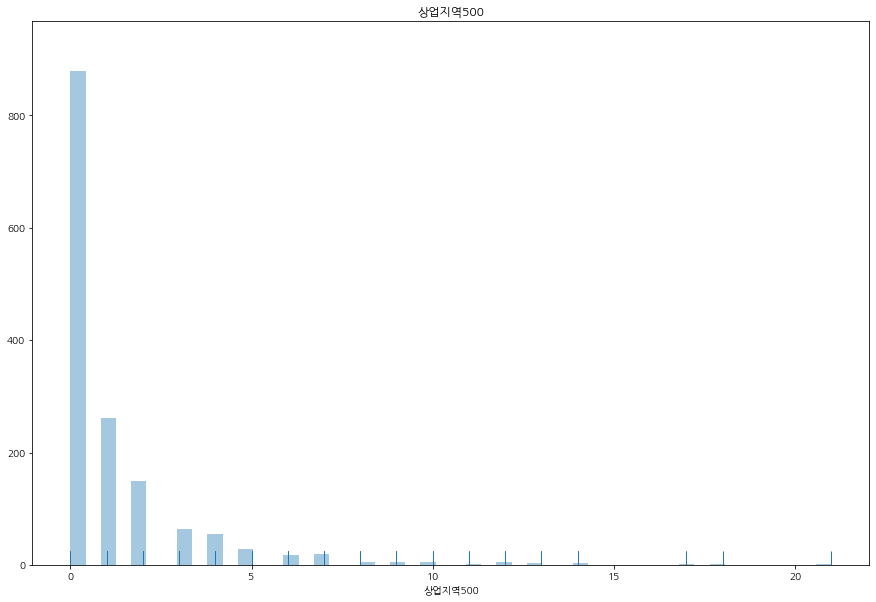

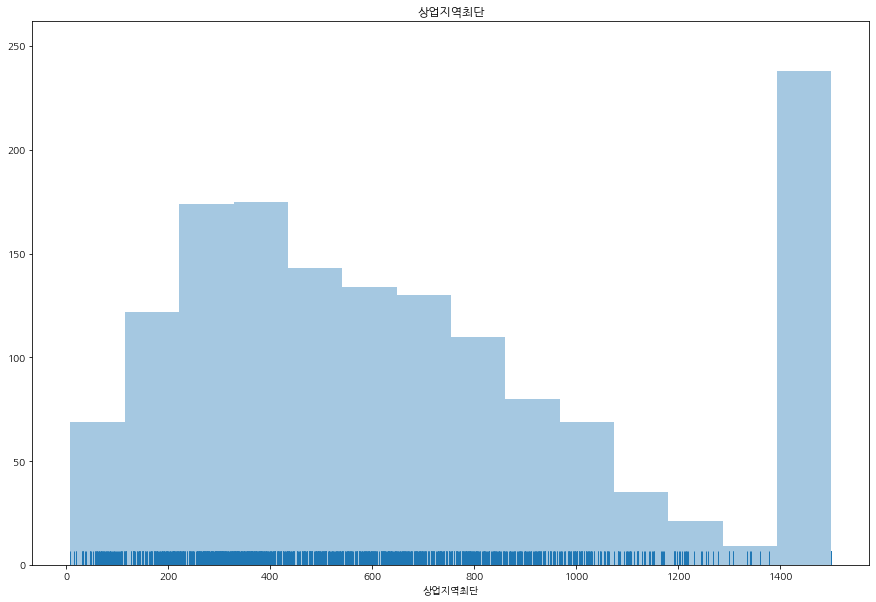

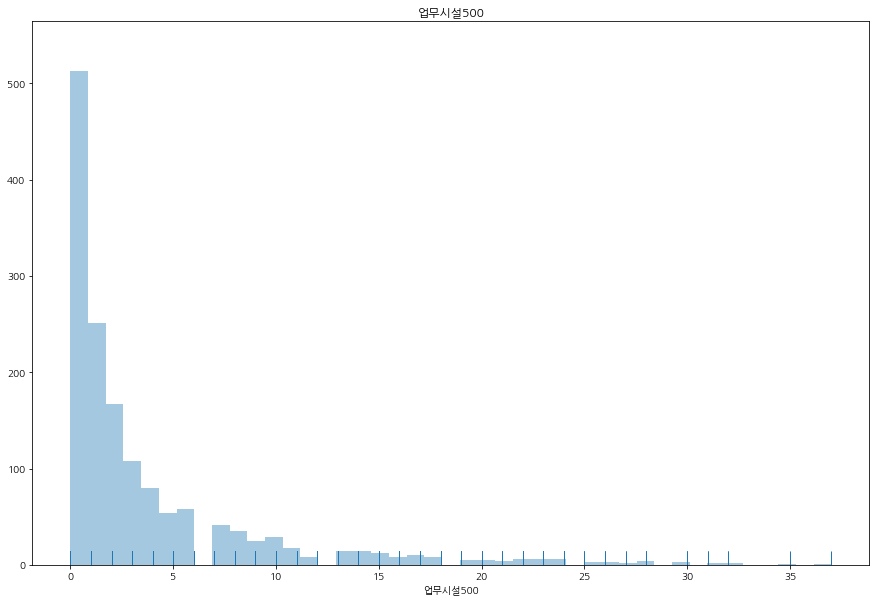

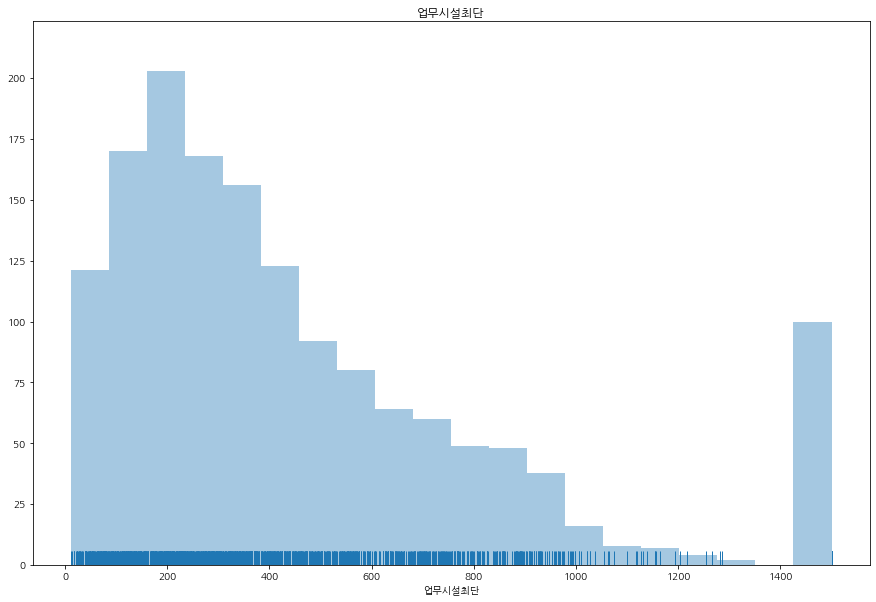

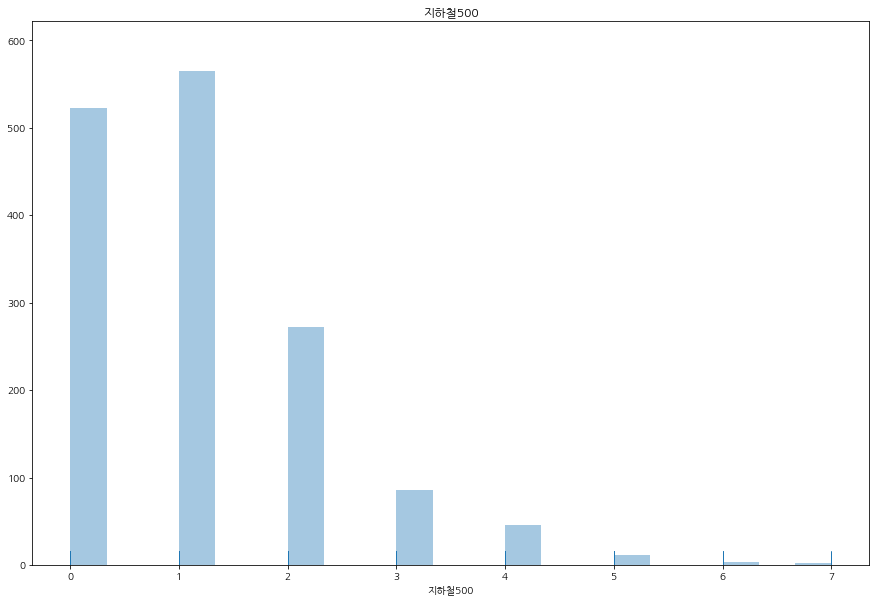

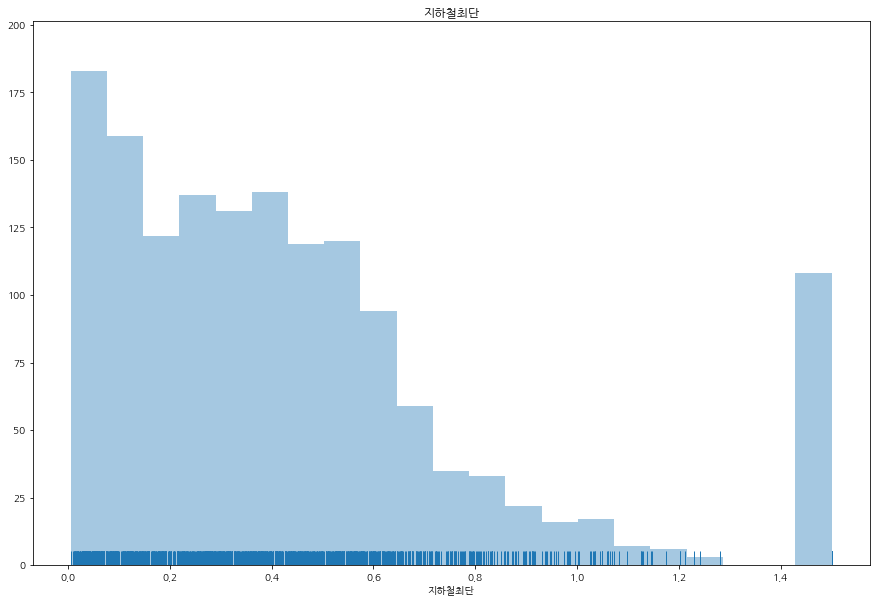

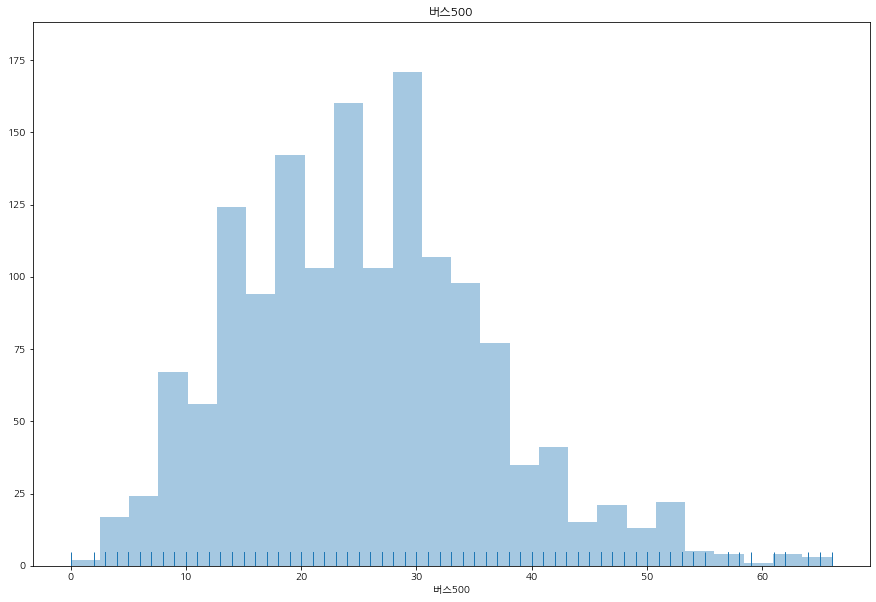

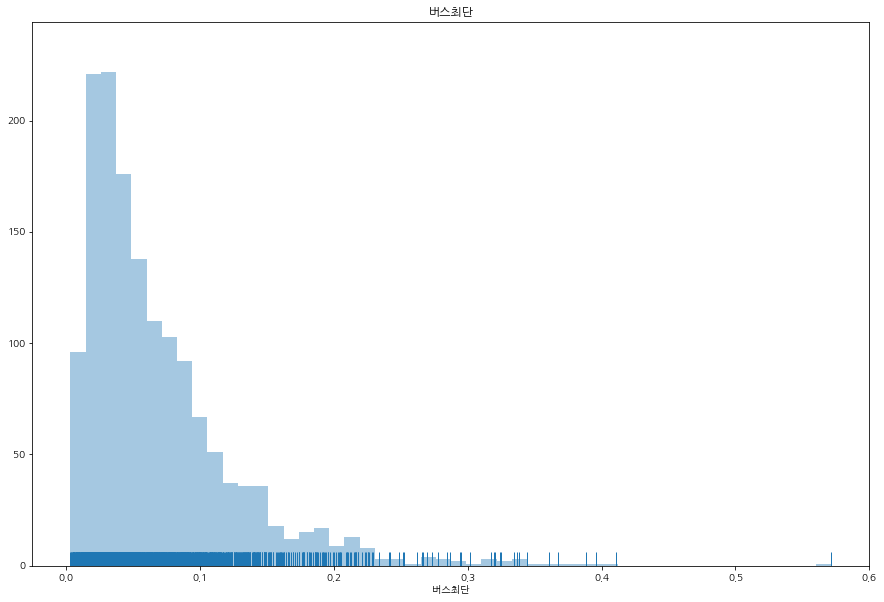

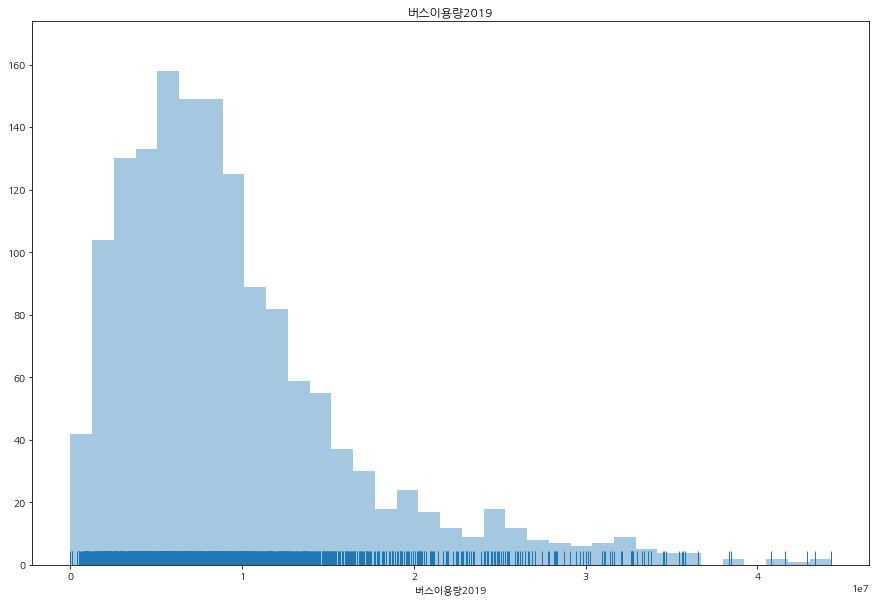

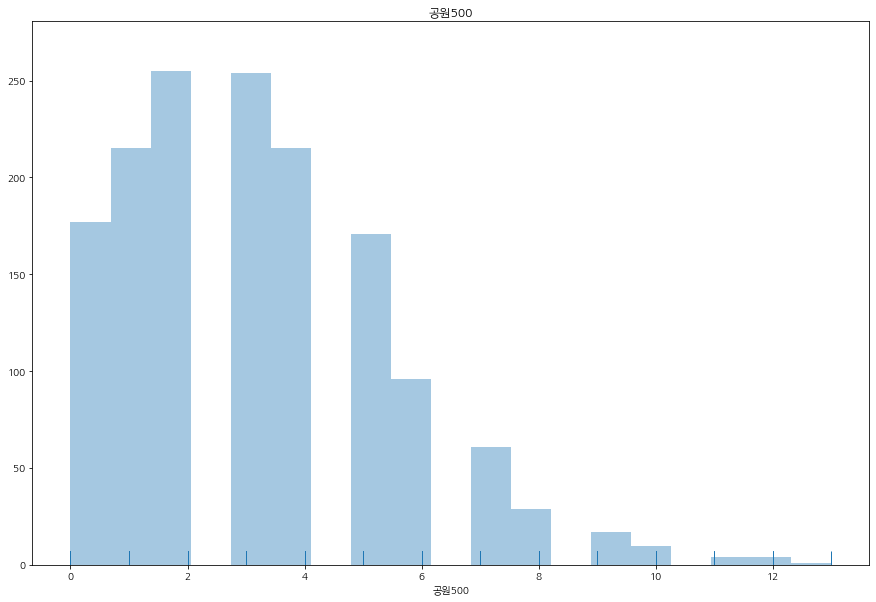

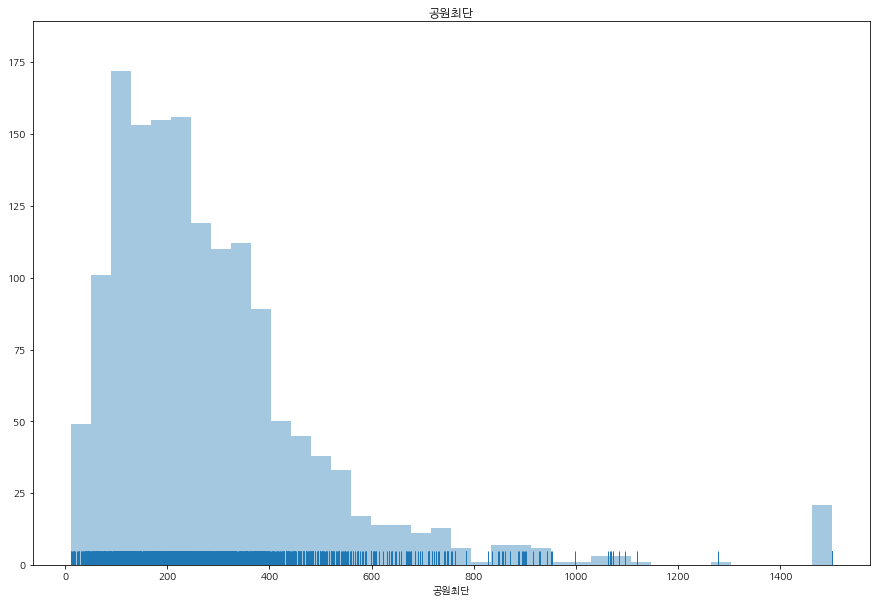

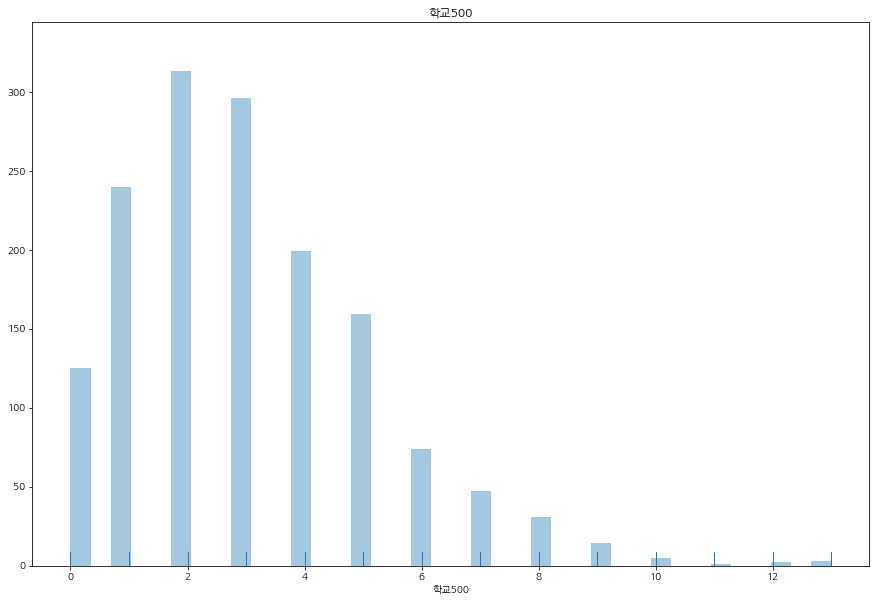

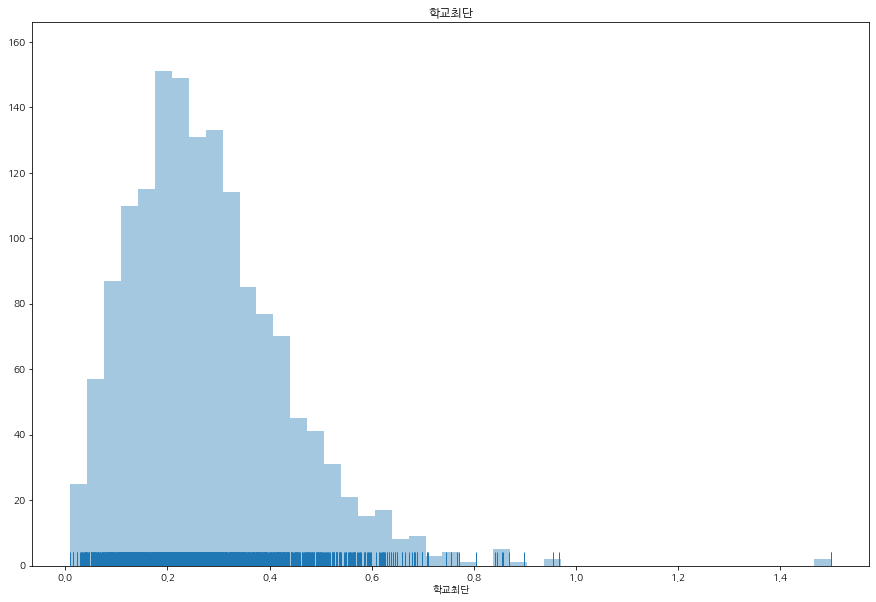

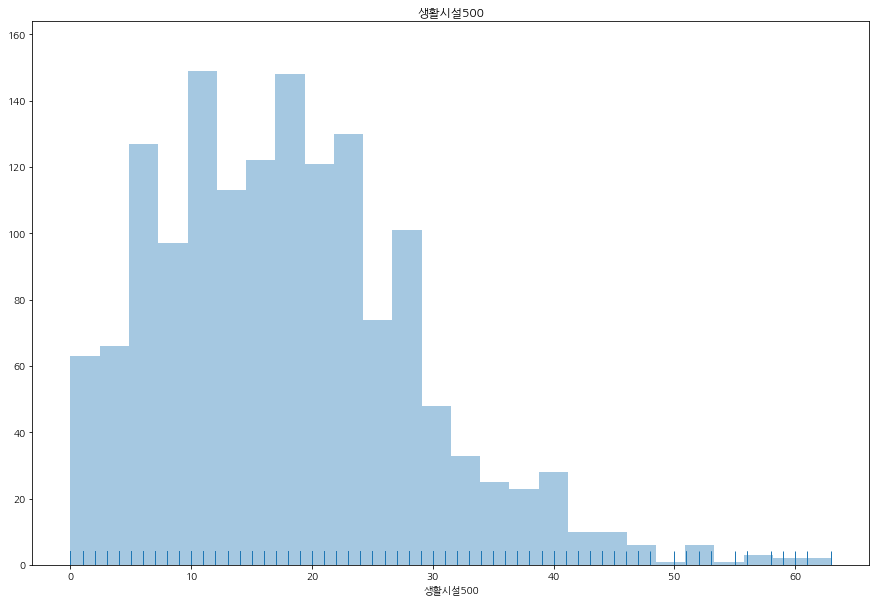

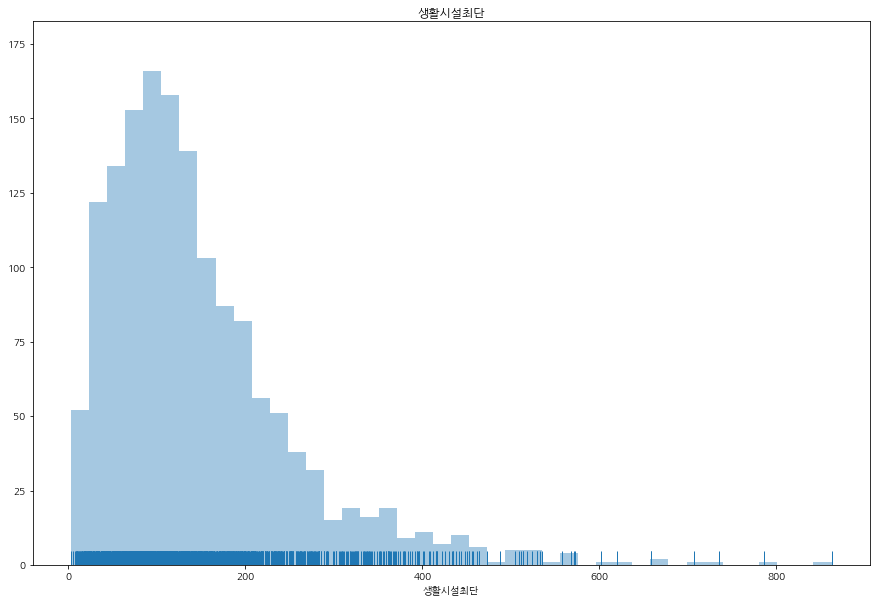

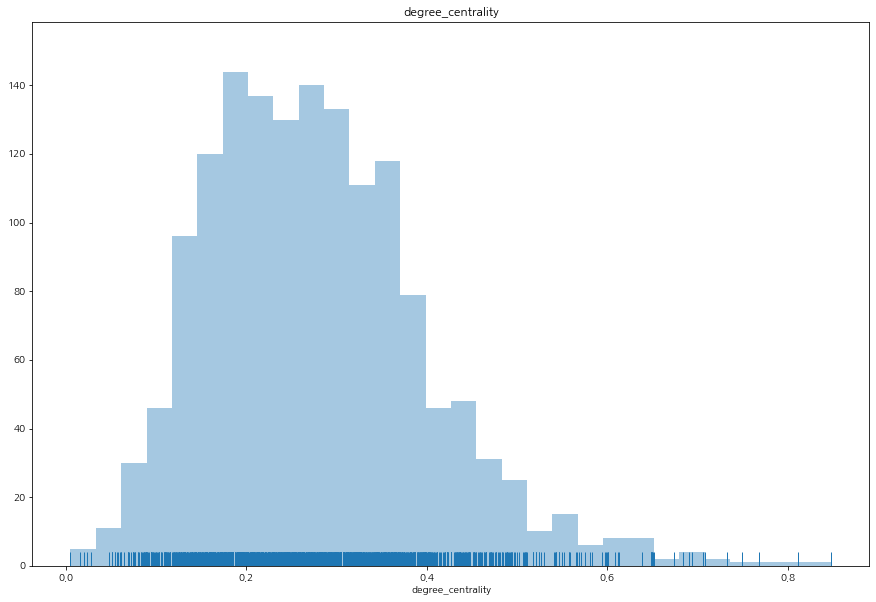

In [ ]:
# 히스토그램
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
for col in Xs[0].columns:
  plt.title(col)
  sns.distplot(Xs[0][col], kde=False, rug=True)
  plt.show()
plt.title('degree_centrality')
sns.distplot(Ys[0]['degree_centrality'], kde=False, rug=True)
plt.show()

In [ ]:
# 로그 변환
import numpy as np
log_cols = ['주거지역500', '주거지역최단', '상업지역500', '상업지역최단', '업무시설500', '업무시설최단', '지하철500', '지하철최단', '버스최단', '공원500', '공원최단', '학교500', '학교최단', '생활시설500', '생활시설최단']
for idx, X in enumerate(Xs):
  Xs[idx][log_cols + ['버스이용량{}'.format(2019 if idx%2==0 else 2020)]] = np.log1p(X[log_cols + ['버스이용량{}'.format(2019 if idx%2==0 else 2020)]])
  Ys[idx] = np.log1p(Ys[idx])

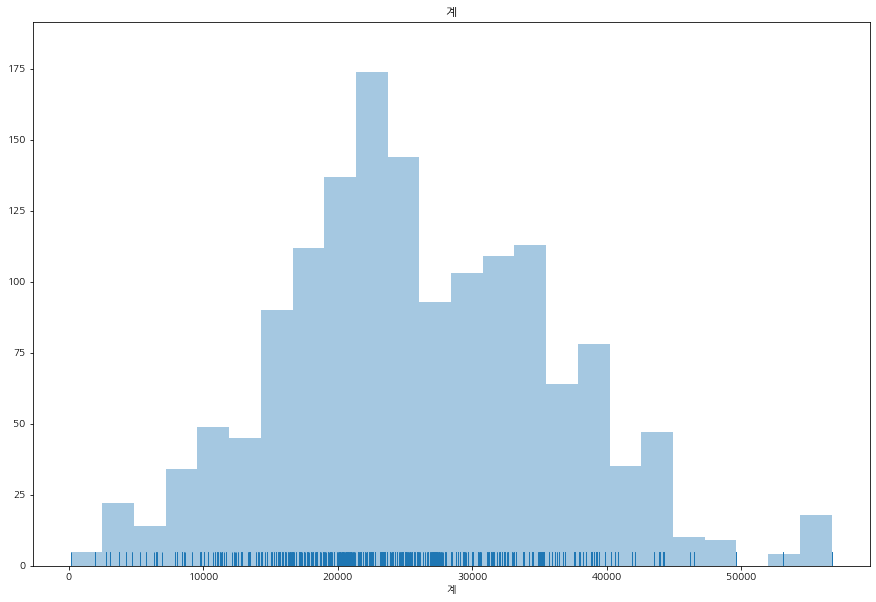

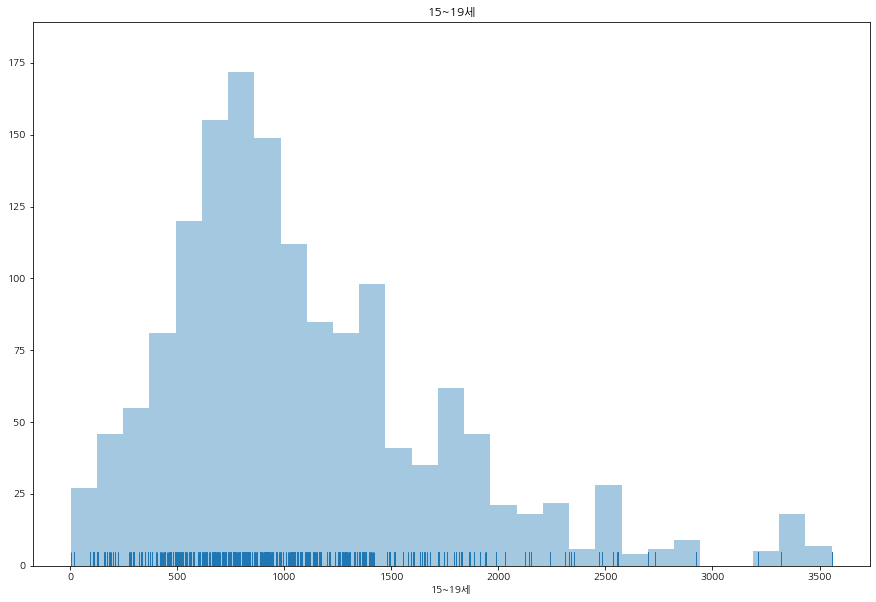

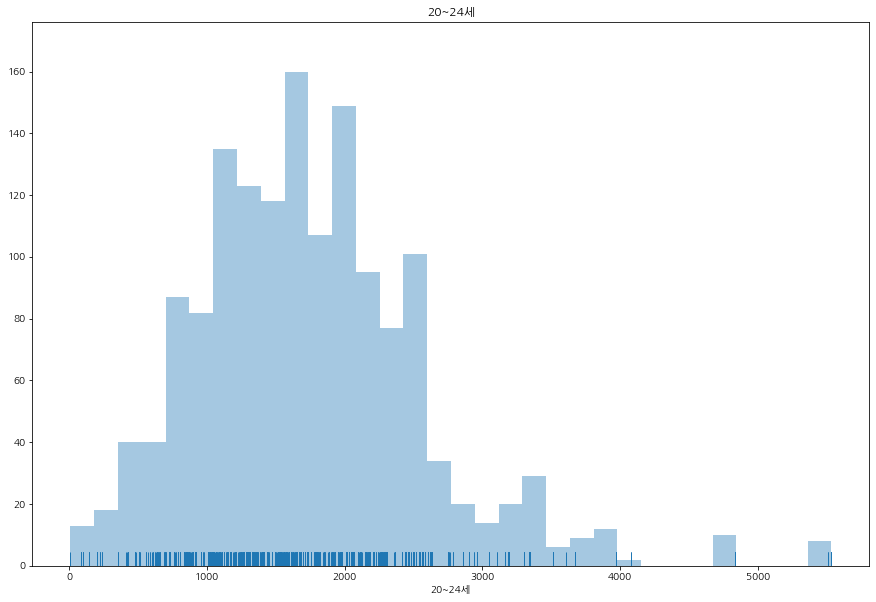

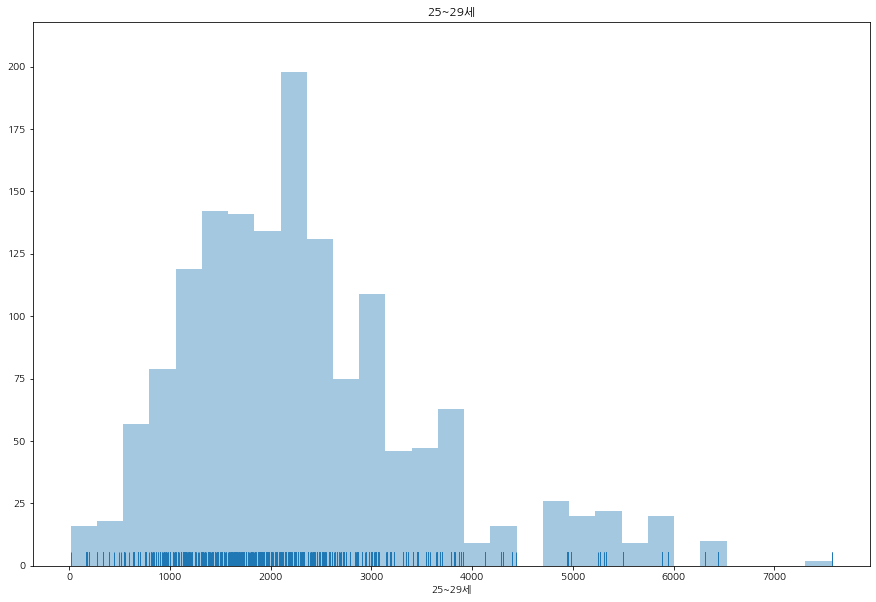

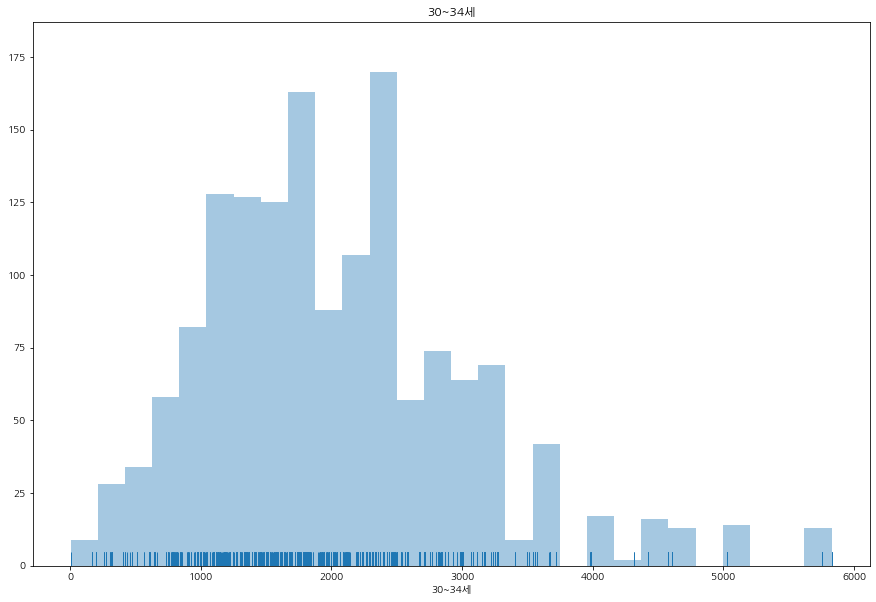

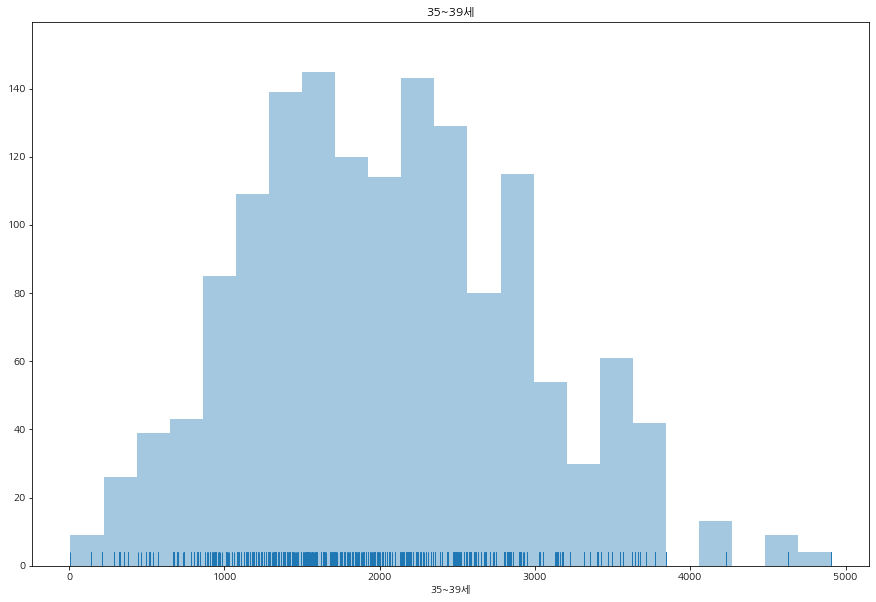

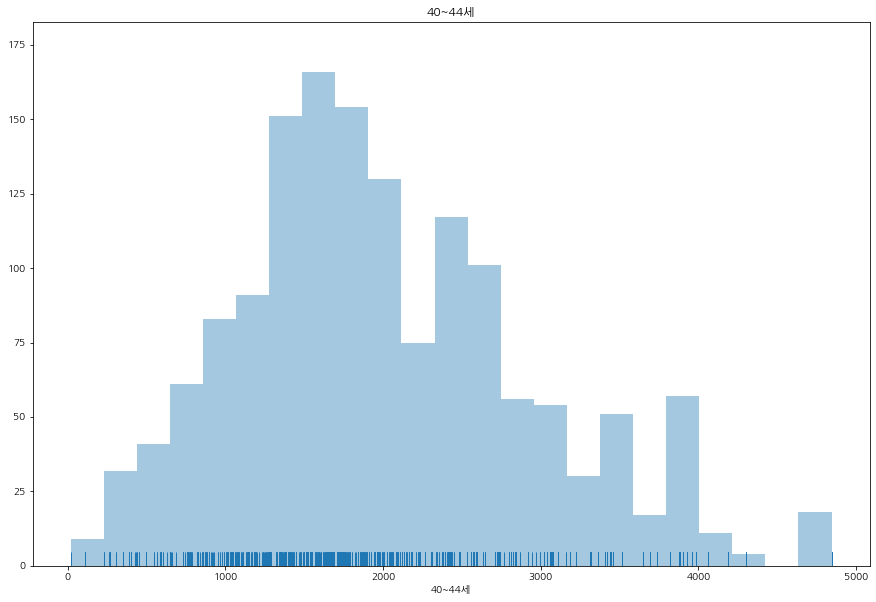

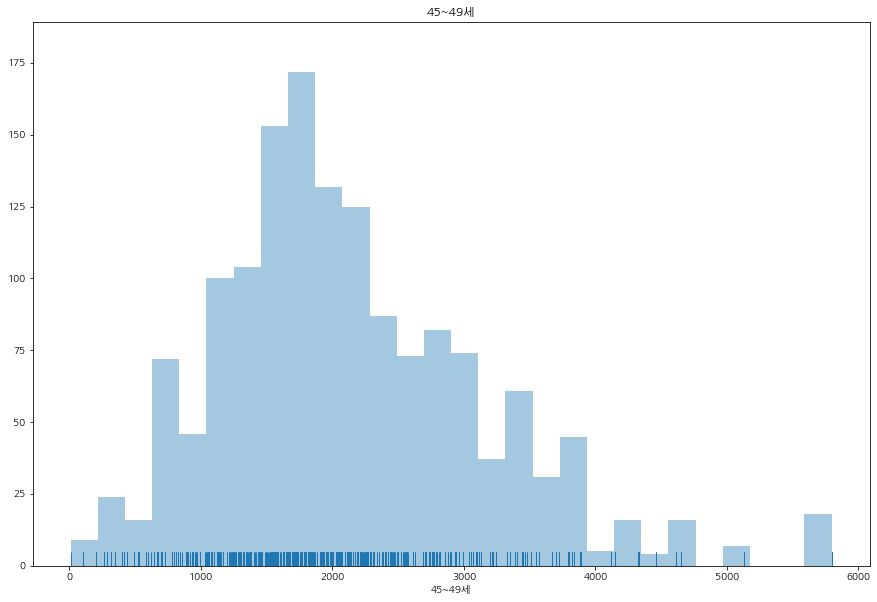

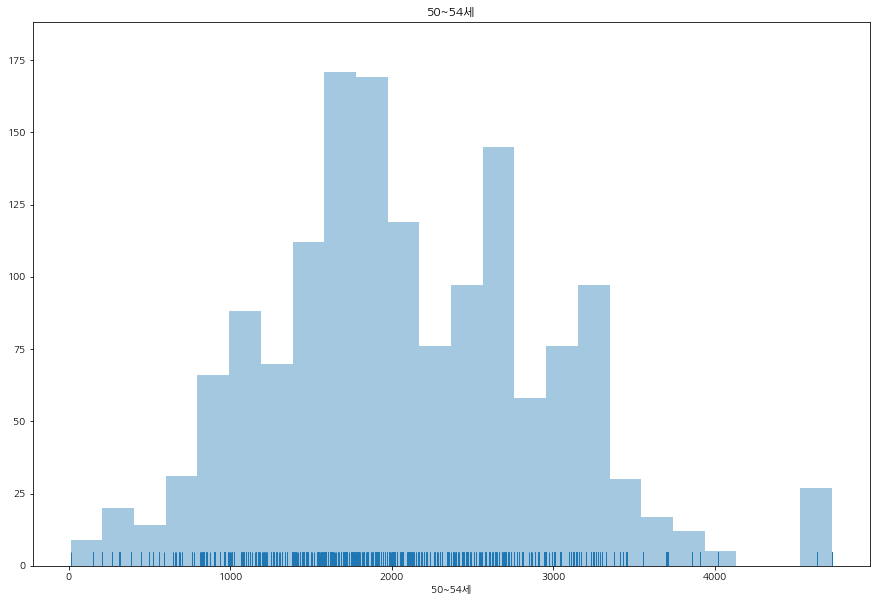

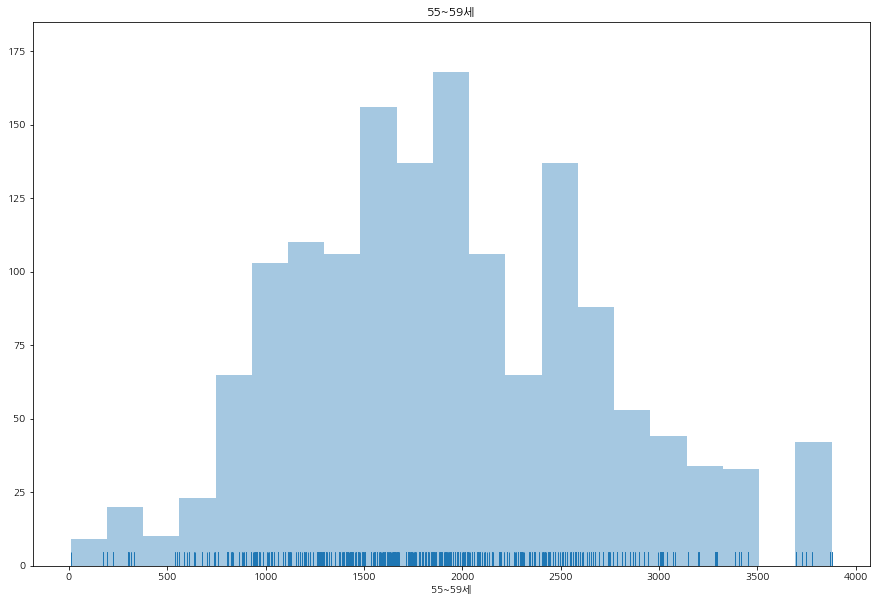

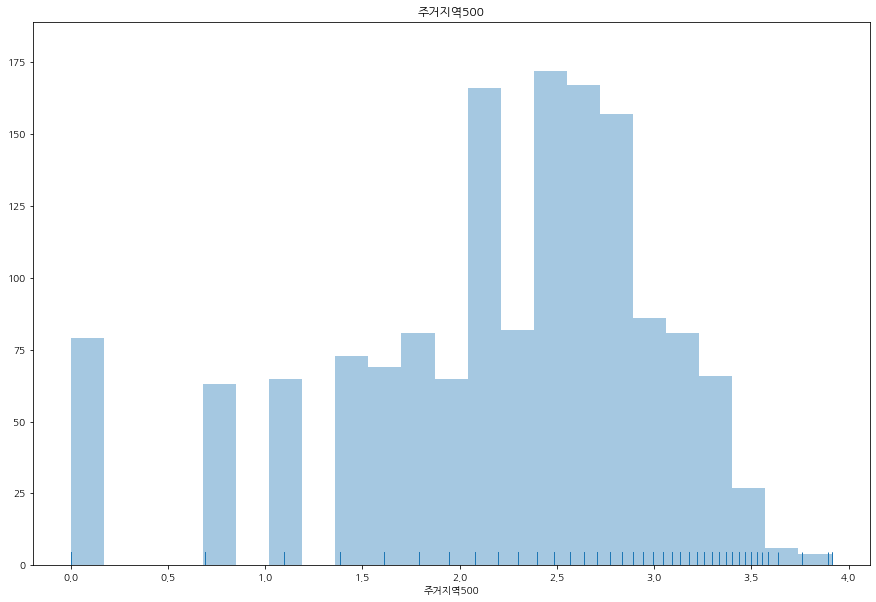

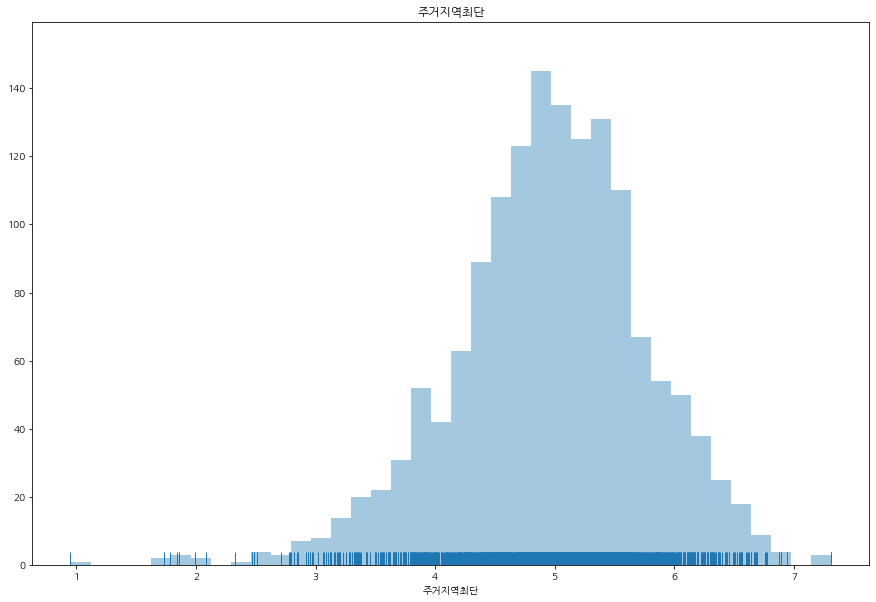

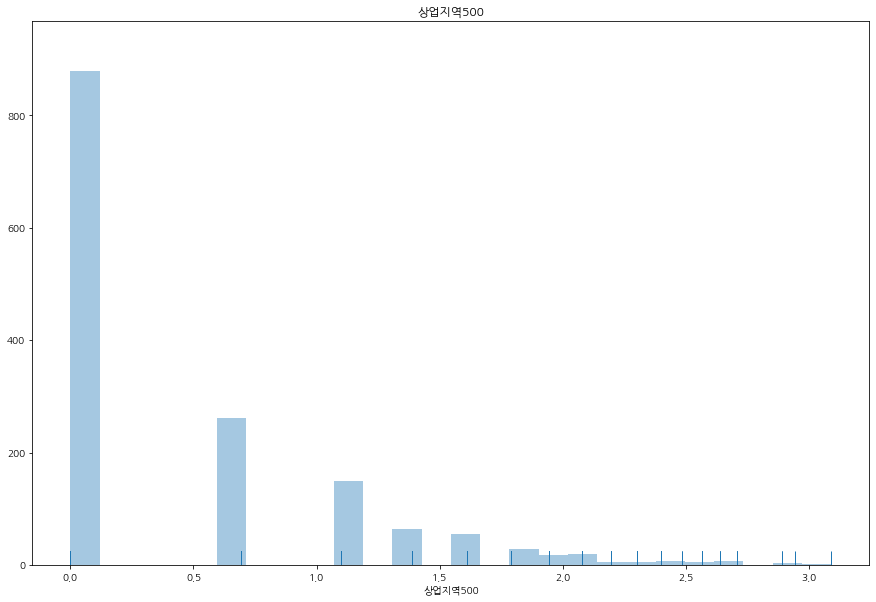

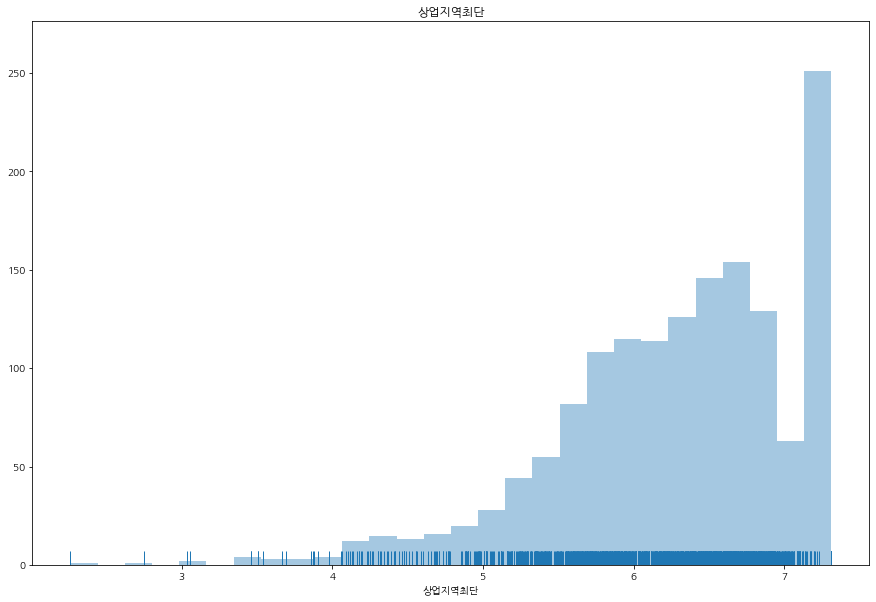

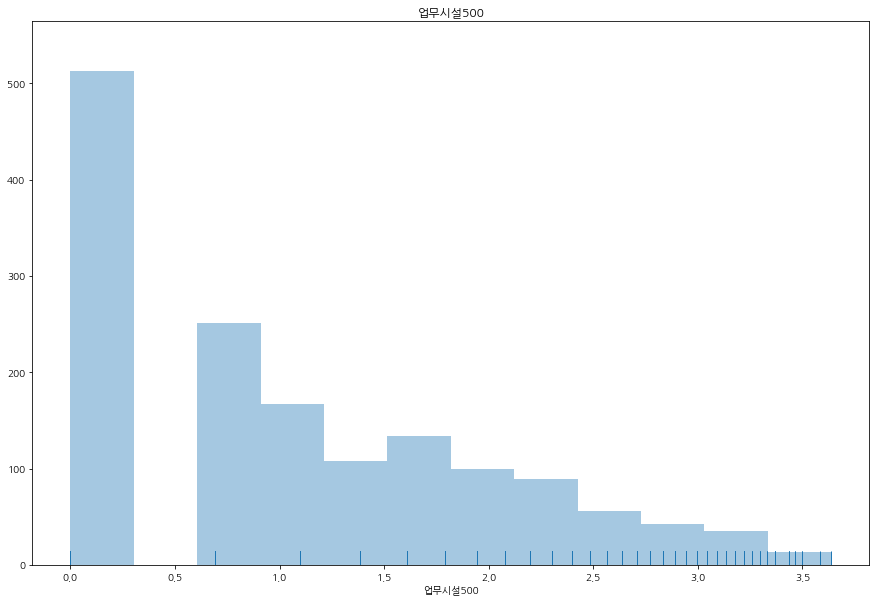

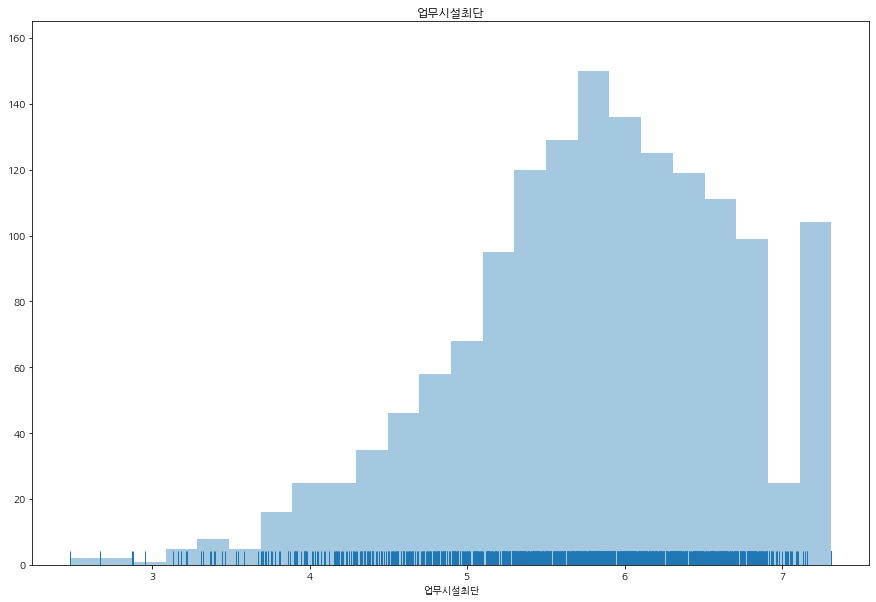

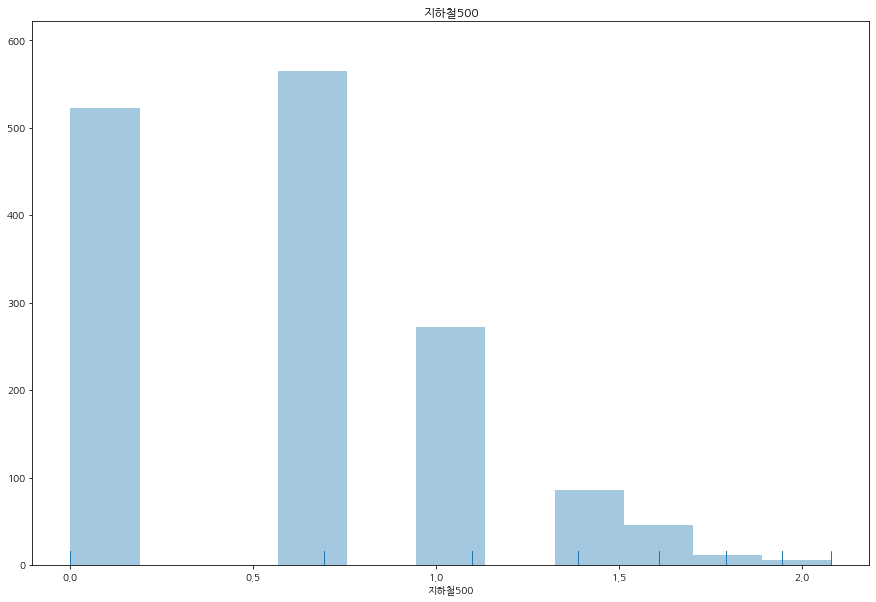

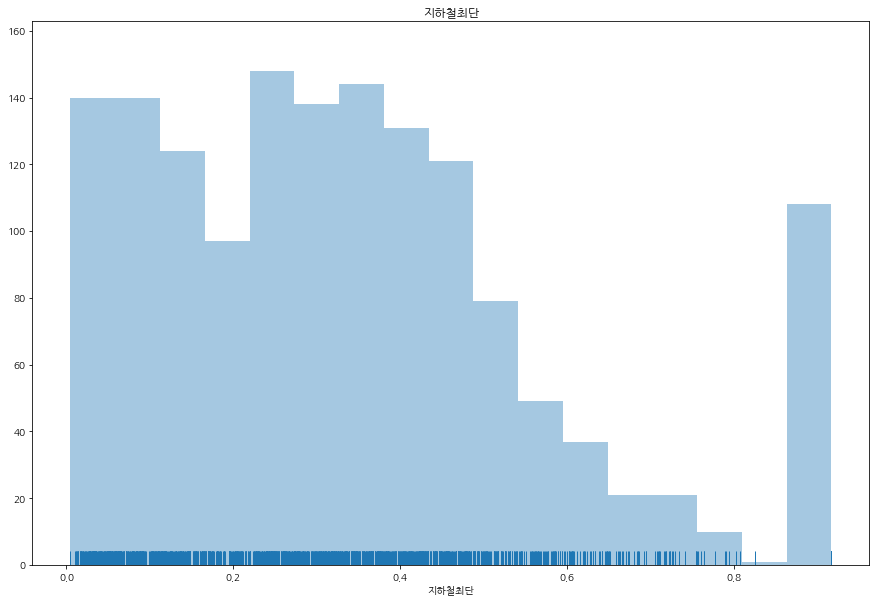

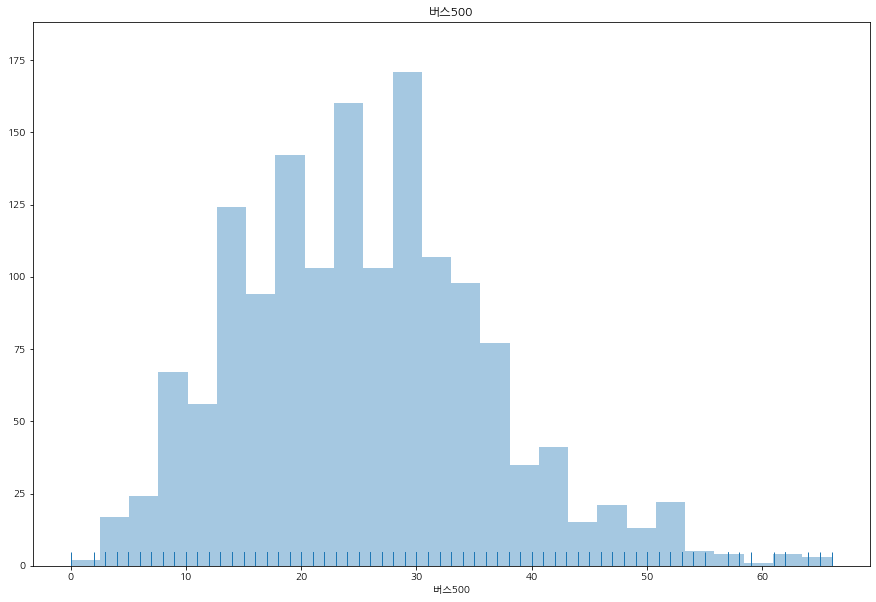

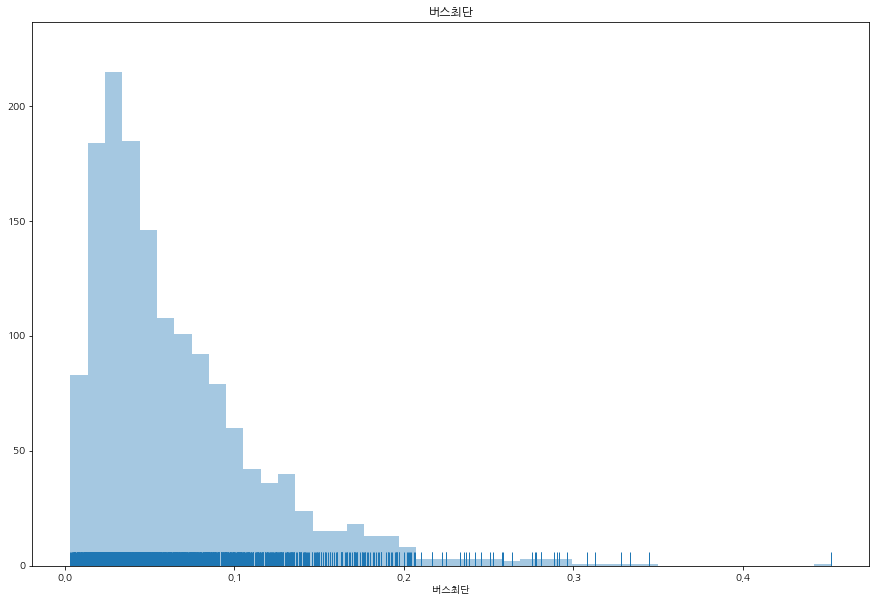

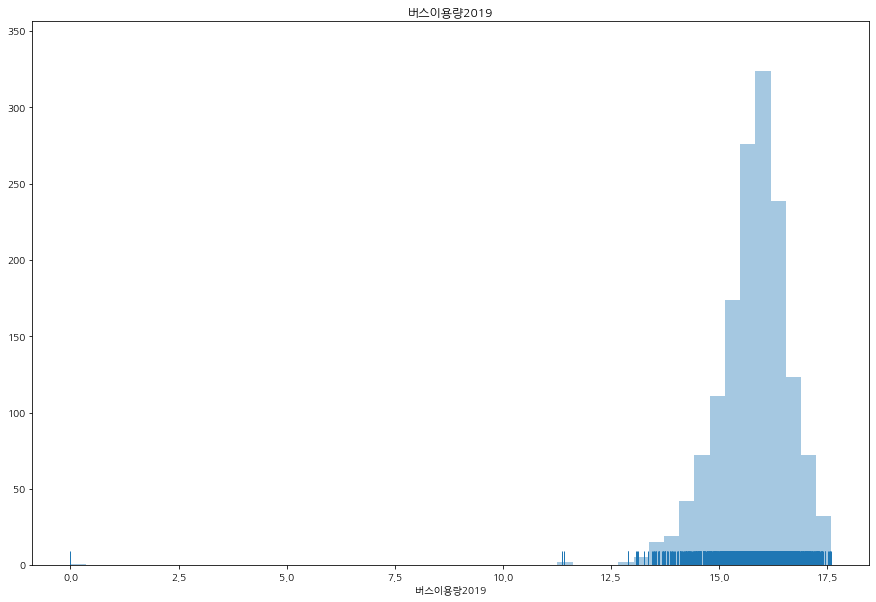

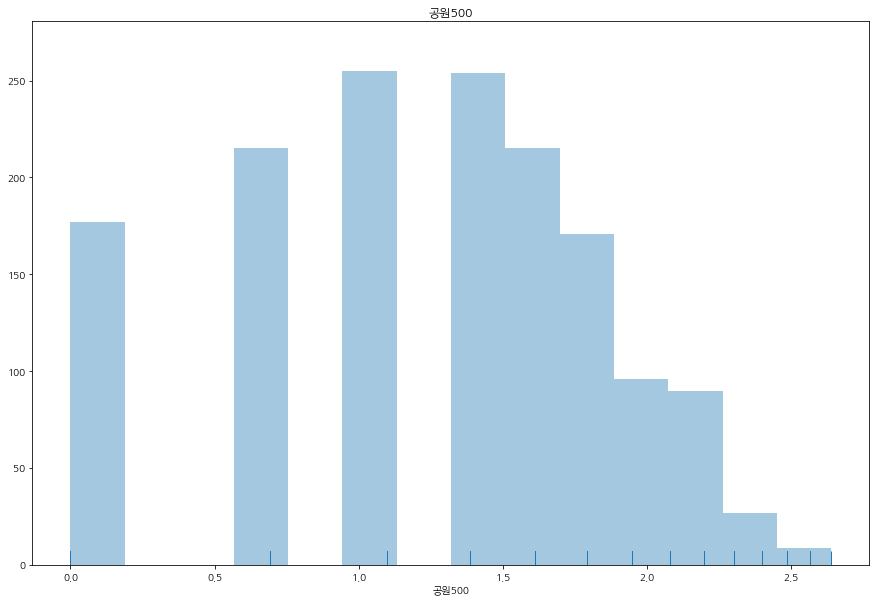

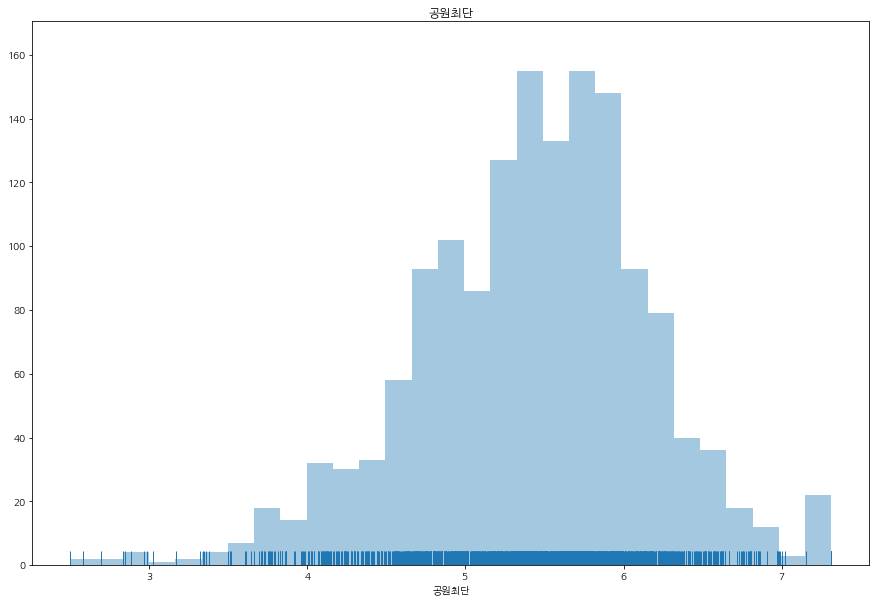

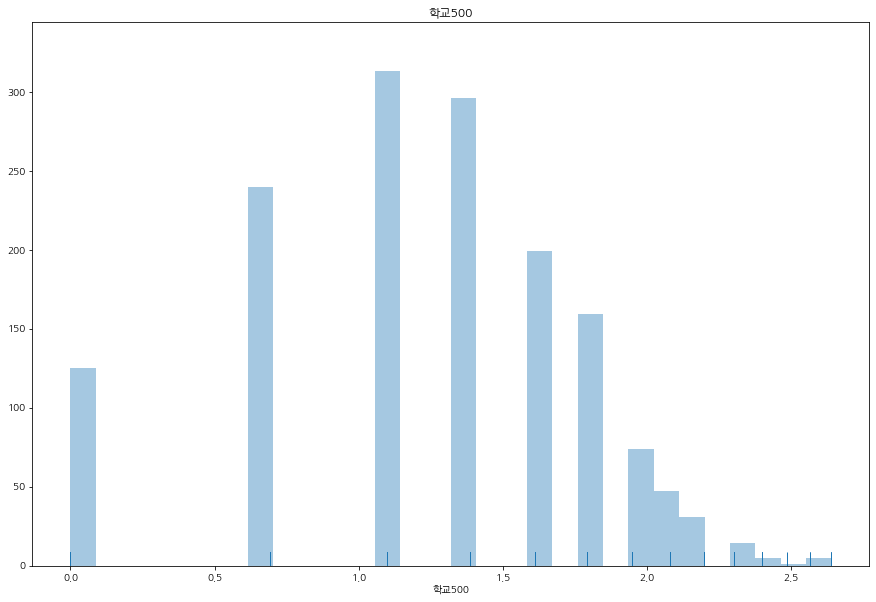

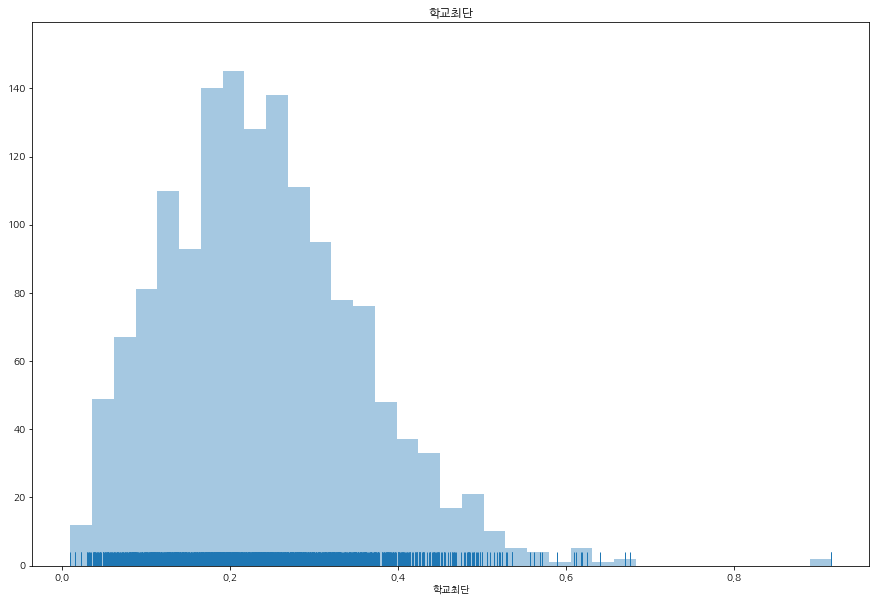

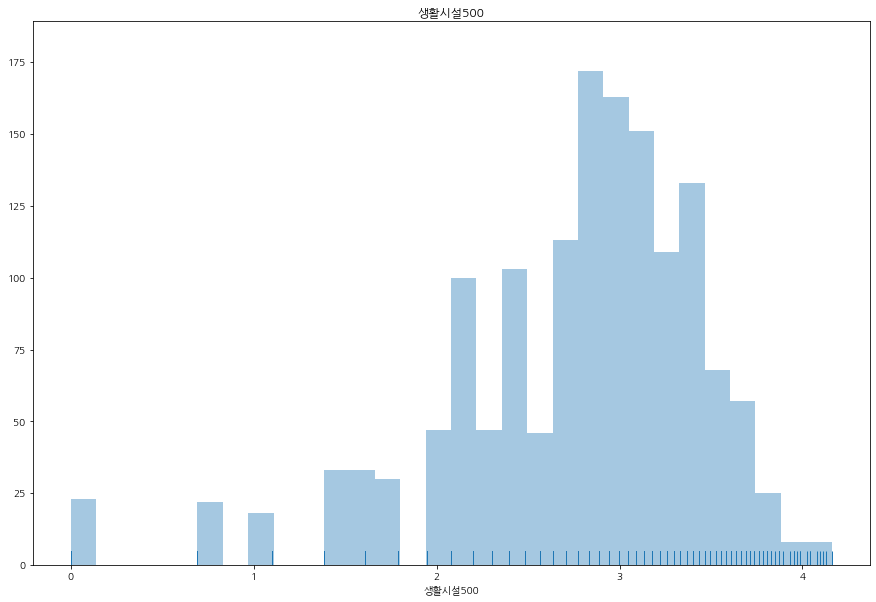

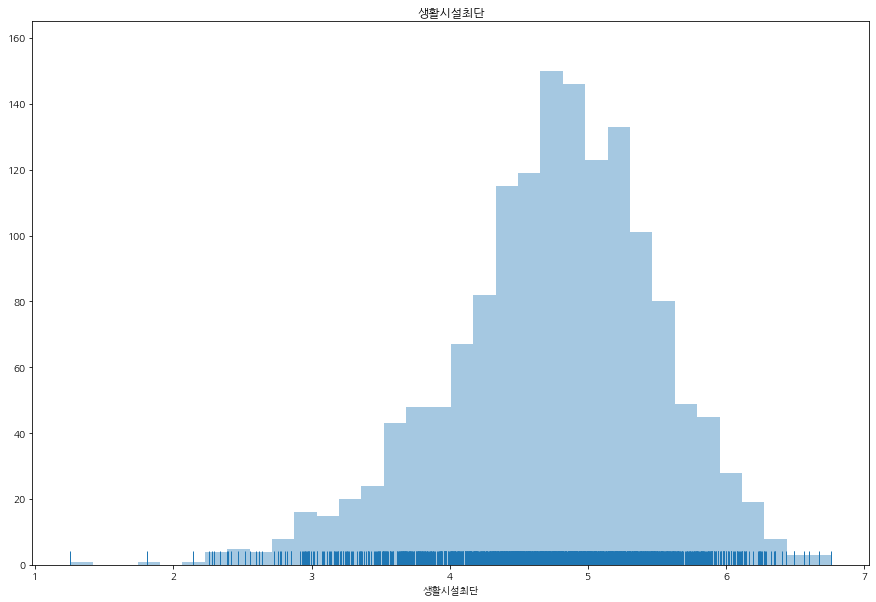

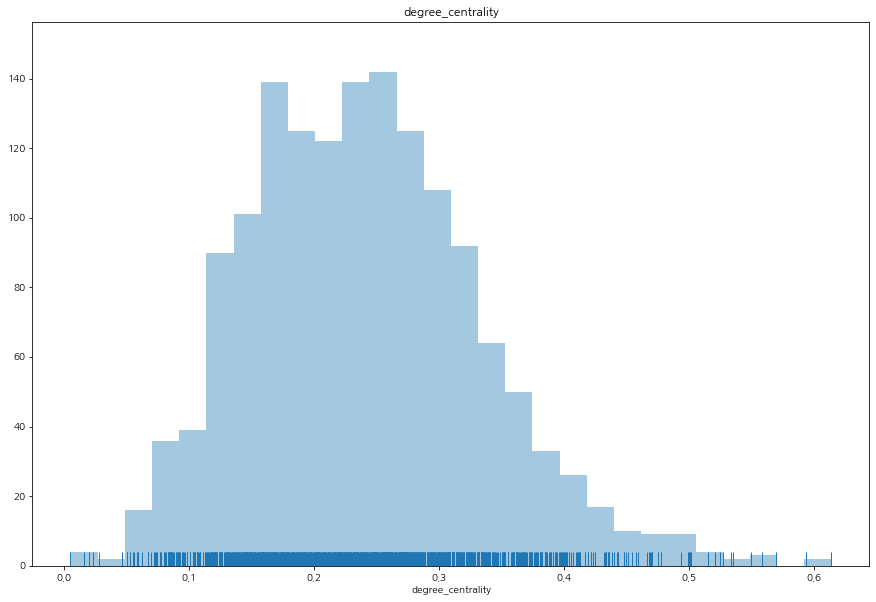

In [ ]:
# 히스토그램
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
for col in Xs[0].columns:
  plt.title(col)
  sns.distplot(Xs[0][col], kde=False, rug=True)
  plt.show()
plt.title('degree_centrality')
sns.distplot(Ys[0]['degree_centrality'], kde=False, rug=True)
plt.show()

[Text(0, 0, '계'),
 Text(0, 0, '15~19세'),
 Text(0, 0, '20~24세'),
 Text(0, 0, '25~29세'),
 Text(0, 0, '30~34세'),
 Text(0, 0, '35~39세'),
 Text(0, 0, '40~44세'),
 Text(0, 0, '45~49세'),
 Text(0, 0, '50~54세'),
 Text(0, 0, '55~59세'),
 Text(0, 0, '주거지역500'),
 Text(0, 0, '주거지역최단'),
 Text(0, 0, '상업지역500'),
 Text(0, 0, '상업지역최단'),
 Text(0, 0, '업무시설500'),
 Text(0, 0, '업무시설최단'),
 Text(0, 0, '지하철500'),
 Text(0, 0, '지하철최단'),
 Text(0, 0, '버스500'),
 Text(0, 0, '버스최단'),
 Text(0, 0, '버스이용량2019'),
 Text(0, 0, '공원500'),
 Text(0, 0, '공원최단'),
 Text(0, 0, '학교500'),
 Text(0, 0, '학교최단'),
 Text(0, 0, '생활시설500'),
 Text(0, 0, '생활시설최단'),
 Text(0, 0, 'degree_centrality')]

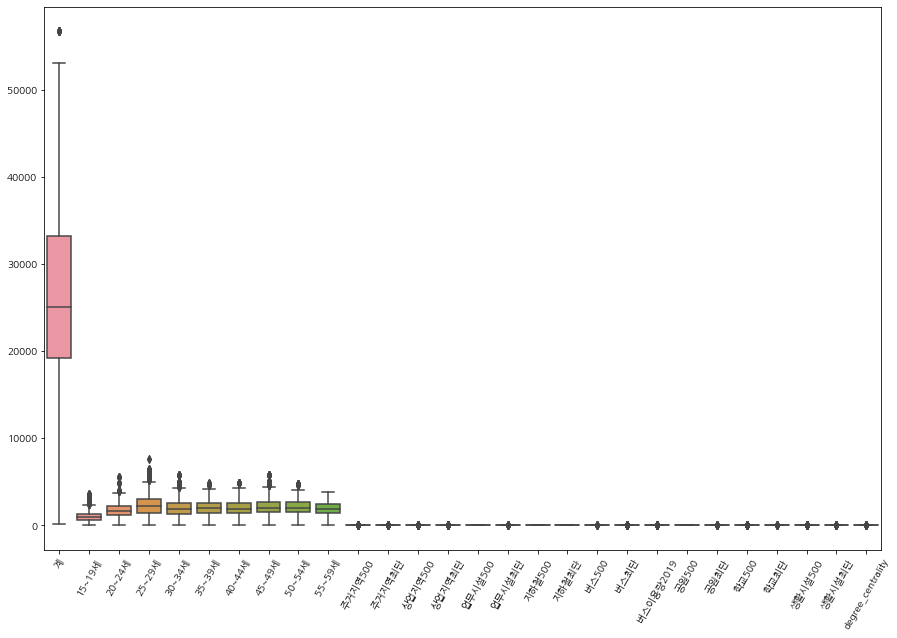

In [ ]:
# Boxplot
import pandas as pd
import seaborn as sns
XY = pd.concat(objs=[Xs[0], Ys[0]])
boxplot = sns.boxplot(data=XY)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=60)

In [ ]:
# 스케일링
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
for idx, X in enumerate(Xs):
  X_scaled = scaler.fit_transform(X)
  Xs[idx] = pd.DataFrame(X_scaled, columns=X.columns)
  Y_scaled = scaler.fit_transform(Ys[idx])
  Ys[idx] = pd.DataFrame(Y_scaled, columns=Ys[idx].columns)

[Text(0, 0, '계'),
 Text(0, 0, '15~19세'),
 Text(0, 0, '20~24세'),
 Text(0, 0, '25~29세'),
 Text(0, 0, '30~34세'),
 Text(0, 0, '35~39세'),
 Text(0, 0, '40~44세'),
 Text(0, 0, '45~49세'),
 Text(0, 0, '50~54세'),
 Text(0, 0, '55~59세'),
 Text(0, 0, '주거지역500'),
 Text(0, 0, '주거지역최단'),
 Text(0, 0, '상업지역500'),
 Text(0, 0, '상업지역최단'),
 Text(0, 0, '업무시설500'),
 Text(0, 0, '업무시설최단'),
 Text(0, 0, '지하철500'),
 Text(0, 0, '지하철최단'),
 Text(0, 0, '버스500'),
 Text(0, 0, '버스최단'),
 Text(0, 0, '버스이용량2019'),
 Text(0, 0, '공원500'),
 Text(0, 0, '공원최단'),
 Text(0, 0, '학교500'),
 Text(0, 0, '학교최단'),
 Text(0, 0, '생활시설500'),
 Text(0, 0, '생활시설최단'),
 Text(0, 0, 'degree_centrality')]

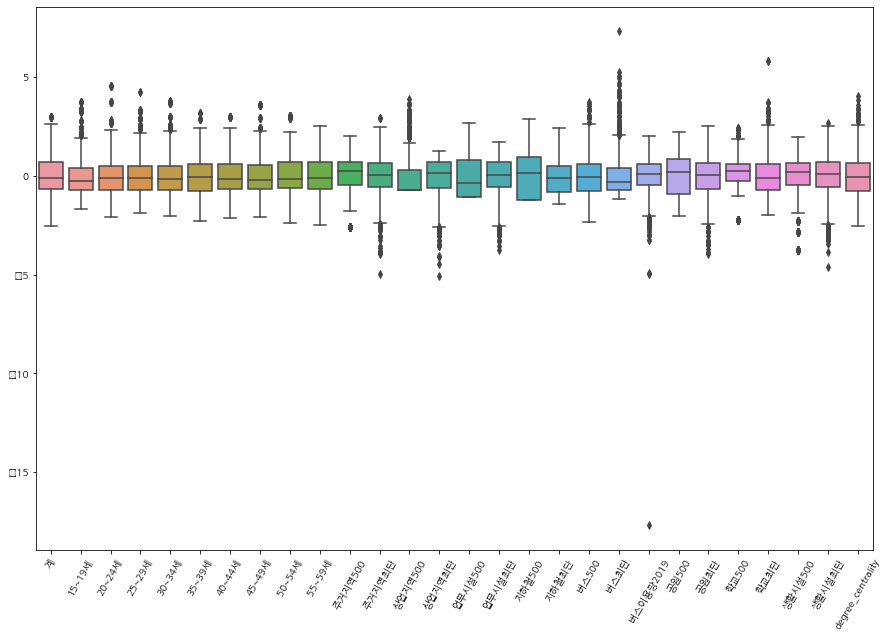

In [ ]:
# Boxplot
import pandas as pd
import seaborn as sns
XY = pd.concat(objs=[Xs[0], Ys[0]])
boxplot = sns.boxplot(data=XY)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=60)

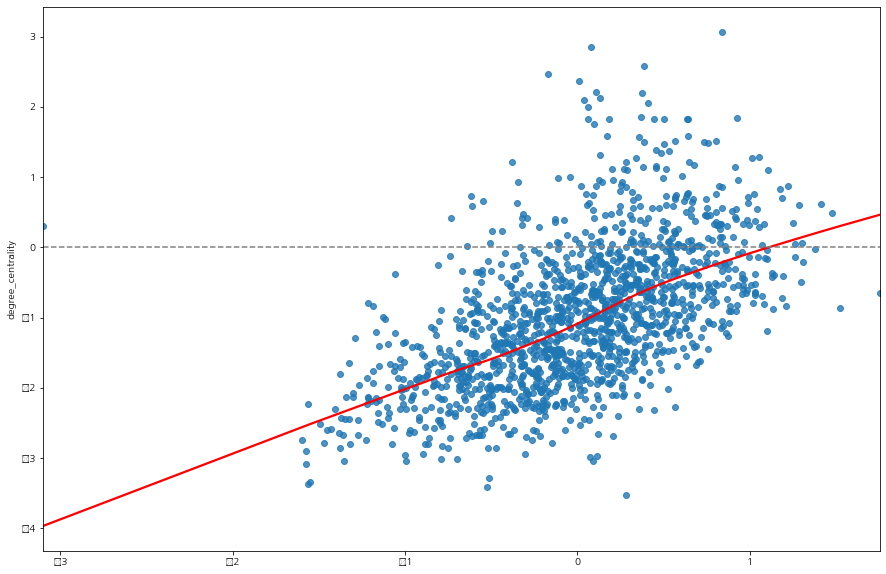

In [ ]:
# 선형성 확인
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
ols = sm.OLS(Ys[0], Xs[0])
ols = ols.fit()
fitted = ols.predict(Xs[0])
residual = Ys[0] - fitted[0]
sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

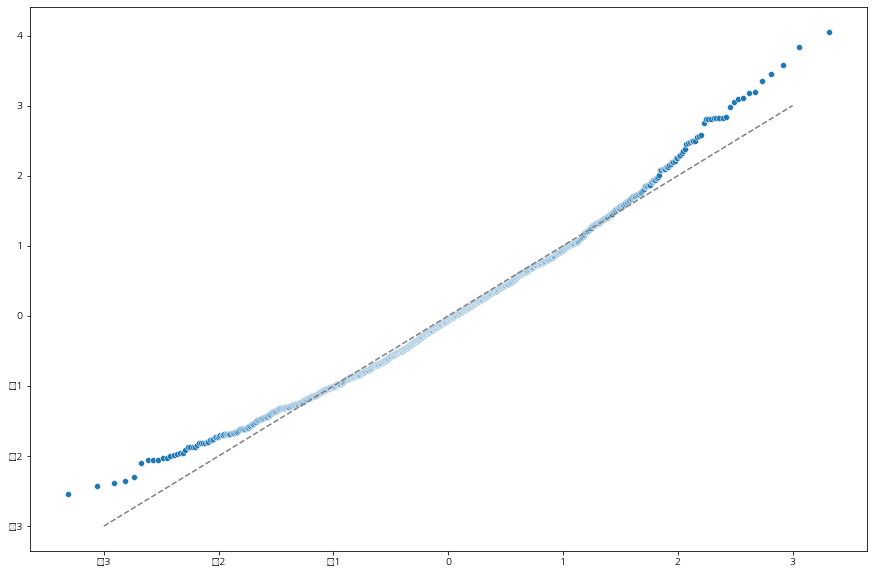

In [ ]:
# 정규성 확인
import numpy as np
import seaborn as sns
import scipy.stats
sr = scipy.stats.zscore(residual)
sr = np.array(sr).reshape(1, -1)[0]
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

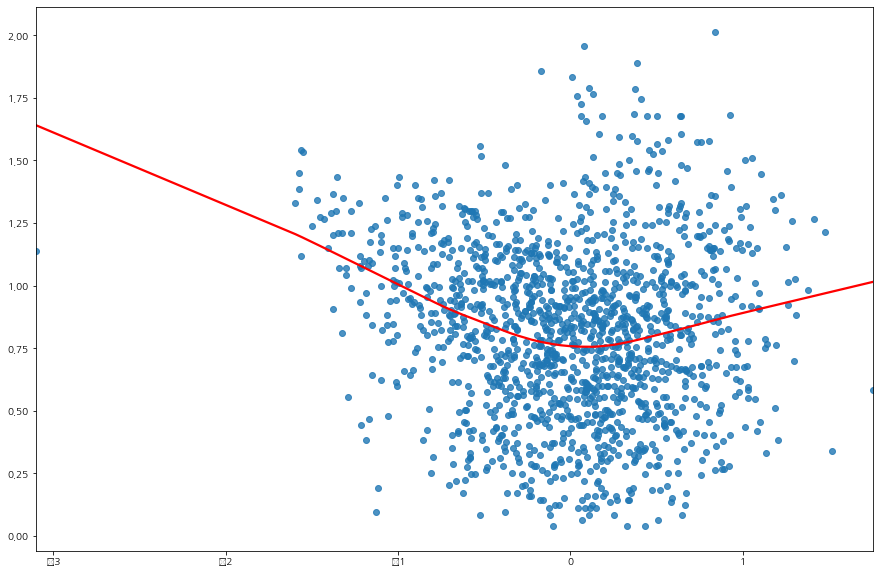

In [ ]:
# 등분산성 확인
import numpy as np
import seaborn as sns
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

In [ ]:
# 영향점 확인
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(ols).cooks_distance
cd.sort_values(ascending=False).head()

1041    0.930751
183     0.013524
1442    0.012863
1072    0.012345
163     0.010985
dtype: float64

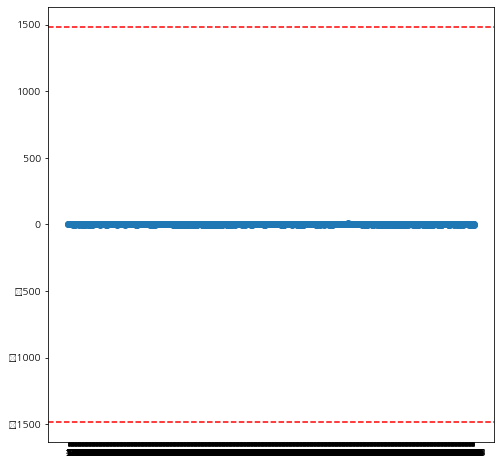

In [ ]:
# 독립변수 이상점 확인
import statsmodels.api as sm
import scipy.stats

def hat_matrix(X):
    X = np.array(X)
    XtX = np.matmul(X.transpose(),X)
    XtX_inv = np.linalg.inv(XtX)
    return np.matmul(np.matmul(X, XtX_inv),X.transpose())

ols = sm.OLS(Ys[0], Xs[0])
fit = ols.fit()
df = Xs[0].copy()
X = Xs[0].copy()
X.insert(0,'Intercept',[1]*len(df))

n = len(df)
p = len(X.columns)
hat_mat = hat_matrix(X)
h = np.array([hat_mat[i][i] for i in range(n)])
e = fit.resid
SSE = np.sum(np.square(e))
sdr = e*np.sqrt((n-p-1)/(SSE*(1-h)-np.square(e)))
alpha = 0.1
critical_value = scipy.stats.norm.ppf(1-alpha/(2*n), n-p-1)

# 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
idx = range(1,n+1)
plt.scatter(idx, sdr)
plt.axhline(critical_value,linestyle='--',color='red')
plt.axhline(-critical_value,linestyle='--',color='red')
plt.xticks(idx)
plt.show()

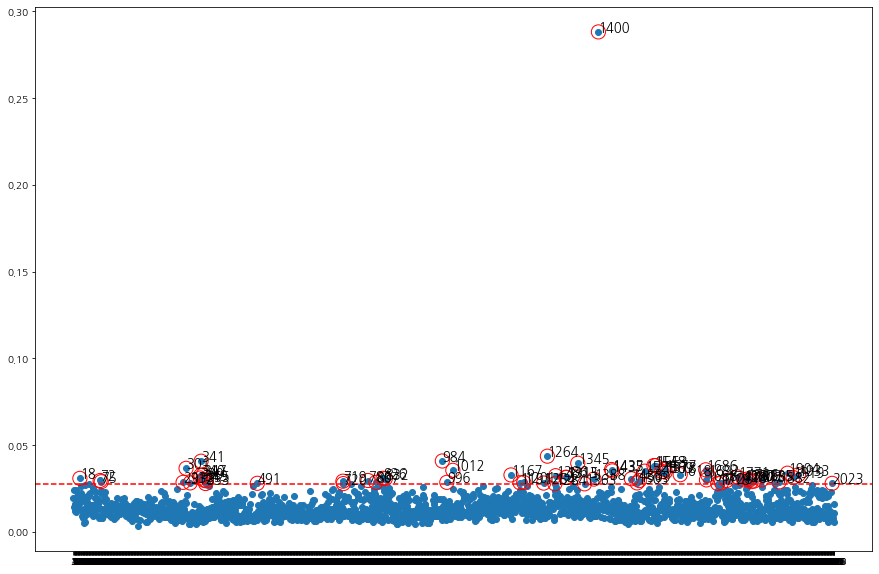

In [ ]:
# 종속변수 이상점 확인 및 제거
import statsmodels.api as sm
import scipy.stats

def hat_matrix(X):
    X = np.array(X)
    XtX = np.matmul(X.transpose(),X)
    XtX_inv = np.linalg.inv(XtX)
    return np.matmul(np.matmul(X, XtX_inv),X.transpose())
 
for idx, Y in enumerate(Ys):
  ols = sm.OLS(Y, Xs[idx])
  fit = ols.fit()
  df = Xs[idx].copy()
  X = Xs[idx].copy()
  X.insert(0,'Intercept',[1]*len(df))

  n = len(df)
  p = len(X.columns)
  hat_mat = hat_matrix(X)
  h = np.array([hat_mat[i][i] for i in range(n)])
  mean_h = p/n
  
  #이상점 제거
  outlier_idx = np.where(h>2*mean_h)[0]
  outlier = [h[i] for i in outlier_idx]



# 시각화
fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
ax = fig.add_subplot()
idx = range(1,n+1)
plt.scatter(idx, h)
plt.scatter(outlier_idx+1,outlier,s=200,facecolor='none',edgecolor='red')
for i in range(len(outlier)):
    ax.annotate(str(outlier_idx[i]+1),(outlier_idx[i]+1.5,outlier[i]),fontsize=13)
plt.axhline(2*mean_h,linestyle='--',color='red')
plt.xticks(idx)
plt.show()

In [ ]:
# 변수 선택
import pandas as pd
import statsmodels.api as sm
for idx, X in enumerate(Xs):
  variables = X.columns.tolist()
  selected_variables = []
  sl_enter = 0.05
  sl_remove = 0.05
  sv_per_step = []
  adjusted_r_squared = []
  steps = []
  step = 0
  while len(variables) > 0:
      remainder = list(set(variables) - set(selected_variables))
      pval = pd.Series(index=remainder)
      for col in remainder:
          X2 = X[selected_variables+[col]]
          X2 = sm.add_constant(X2)
          model = sm.OLS(Ys[idx],X2).fit()
          pval[col] = model.pvalues[col]
      min_pval = pval.min()
      if min_pval < sl_enter:
          selected_variables.append(pval.idxmin())
          while len(selected_variables) > 0:
              selected_X = X[selected_variables]
              selected_X = sm.add_constant(selected_X)
              selected_pval = sm.OLS(Ys[idx],selected_X).fit().pvalues[1:]
              max_pval = selected_pval.max()
              if max_pval >= sl_remove:
                  remove_variable = selected_pval.idxmax()
                  selected_variables.remove(remove_variable)
              else:
                  break
          step += 1
          steps.append(step)
          adj_r_squared = sm.OLS(Ys[idx],sm.add_constant(X[selected_variables])).fit().rsquared_adj
          adjusted_r_squared.append(adj_r_squared)
          sv_per_step.append(selected_variables.copy())
      else:
          break
  Xs[idx] = X[selected_variables]

#2. 모델 정의

In [ ]:
# 모델 구조 및 Parameter정의
from keras.optimizers import SGD
from keras.optimizers import Adam

def model1(input_size) :
  model = models.Sequential() # ANN 형성
  model.add(layers.Dense(128, activation = 'relu', input_shape=(input_size,))) # Hidden layer
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(32, activation = 'relu'))
  model.add(layers.Dense(32, activation = 'relu'))
  model.add(layers.Dense(16, activation = 'relu')) # Hidden layer
  model.add(layers.Dense(16, activation = 'relu')) # Hidden layer
  model.add(layers.Dense(8, activation = 'relu')) # Hidden layer
  model.add(layers.Dense(8, activation = 'relu')) # Hidden layer
  model.add(layers.Dense(4, activation = 'relu')) # Hidden layer
  model.add(layers.Dense(4, activation = 'relu')) # Hidden layer
  model.add(layers.Dense(1)) # Output layer - regression은 node가 1개
  return model


def model2(input_size):
  model = models.Sequential() # ANN 형성
  model.add(layers.Dense(128, activation = 'relu', input_shape=(input_size,))) # Hidden layer
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(32, activation = 'relu'))
  model.add(layers.Dense(16, activation = 'relu')) # Hidden layer
  model.add(layers.Dense(8, activation = 'relu')) # Hidden layer
  model.add(layers.Dense(4, activation = 'relu')) # Hidden layer
  model.add(layers.Dense(1)) # Output layer - regression은 node가 1개
  return model

def model3(input_size):
  model = models.Sequential() # ANN 형성
  model.add(layers.Dense(64, activation = 'relu', input_shape=(input_size,))) # Hidden layer
  model.add(layers.Dense(16, activation = 'relu'))
  model.add(layers.Dense(4, activation='relu'))
  model.add(layers.Dense(1)) # Output layer - regression은 node가 1개
  return model

def get_multiple_models(input_size):
  model_arch1 = model1(input_size)
  model_arch2 = model2(input_size)
  model_arch3 = model3(input_size)
  models = [model_arch1, model_arch2, model_arch3]
  lrs = [0.1, 0.01]
  
  optims = []
  for lr in lrs:
    optims.append(SGD(lr=lr, momentum=0.9))
    optims.append(Adam(lr=lr))
  
  model_params = []
  for optim in optims:
    # for model in models:
      model_params.append([model1(input_size), optim])
      model_params.append([model2(input_size), optim])
      model_params.append([model3(input_size), optim])
  return model_params



In [ ]:
# Network 학습
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import r2_score

def train_dataset (train_X, train_y):
  tf.random.set_seed(2020)
  model_params = get_multiple_models(train_X.shape[1])


  histories = []
  trained_models = []
  for model_param in model_params:
    model = 0
    model = model_param[0]
    optim = model_param[1]
    model.compile(optimizer=optim, loss='mse', metrics=['mse', 'mape'])

    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
    lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # learning rate 관련

    history = model.fit(train_X, train_y, epochs=10000, batch_size=16, 
                          validation_split=0.1, callbacks=[es,lr]) #,callbacks=[es,lr])
    
    histories.append(history)
    trained_models.append(model)


  
  return histories, trained_models


## 3. 모델 학습

## 1) 데이터셋 분리 (Train, Test)

In [ ]:
# Train&Test Split
from sklearn.model_selection import train_test_split
Train_Xs = []
Train_Ys = []
Test_Xs = []
Test_Ys = []
for idx, X in enumerate(Xs):
  train_X, test_X, train_y, test_y = train_test_split( 
    X, Ys[idx], test_size = 0.1, random_state = 2021)
  Train_Xs.append(train_X)
  Test_Xs.append(test_X)
  Train_Ys.append(train_y)
  Test_Ys.append(test_y)

##2) 네트워크 학습

In [ ]:
hists_all = []
trained_all = []
for idx in range(6):
  print("---------------------------------------------------------------------------DATASET ",idx,"-------------------------------------------------------------------")
  hists, trained = train_dataset(Train_Xs[idx], Train_Ys[idx])
  hists_all.append(hists)
  trained_all.append(trained)

---------------------------------------------------------------------------DATASET  0 -------------------------------------------------------------------
Epoch 1/10000
77/77 [==============================] - 1s 5ms/step - loss: 1.0437 - mse: 1.0437 - mape: 205.5024 - val_loss: 1.0844 - val_mse: 1.0844 - val_mape: 171.7756
Epoch 2/10000
77/77 [==============================] - 0s 2ms/step - loss: 1.0282 - mse: 1.0282 - mape: 161.3583 - val_loss: 1.1436 - val_mse: 1.1436 - val_mape: 213.0926
Epoch 3/10000
77/77 [==============================] - 0s 2ms/step - loss: 1.0675 - mse: 1.0675 - mape: 198.9088 - val_loss: 1.1204 - val_mse: 1.1204 - val_mape: 199.2798
Epoch 4/10000
77/77 [==============================] - 0s 2ms/step - loss: 1.0844 - mse: 1.0844 - mape: 235.2501 - val_loss: 1.3445 - val_mse: 1.3445 - val_mape: 213.8024
Epoch 5/10000
77/77 [==============================] - 0s 2ms/step - loss: 1.0219 - mse: 1.0219 - mape: 147.4622 - val_loss: 1.1888 - val_mse: 1.1888 - val_mape: 

##3) R2 Score 뽑아서 Best Model 정하기

In [ ]:
#R2 Score 뽑기
for idx in range(6):
  print("Dataset", idx)
  trained = trained_all[idx]
  for t_idx, model in enumerate(trained):
    pred_train = model.predict(Train_Xs[idx])
    r2_train = r2_score(Train_Ys[idx], pred_train)
    pred_test = model.predict(Test_Xs[idx])
    r2_test = r2_score(Test_Ys[idx], pred_test)
    print("model ",t_idx," - r2_train", r2_train, "r2_test", r2_test)
    model.save('./model/{}_{}'.format(idx, t_idx))

Dataset 0
model  0  - r2_train -0.04138252544048582 r2_test -0.0034048944158850958
INFO:tensorflow:Assets written to: ./model/0_0/assets
model  1  - r2_train 0.4851942253487619 r2_test 0.3174404794222975
INFO:tensorflow:Assets written to: ./model/0_1/assets
model  2  - r2_train 0.4614871297068205 r2_test 0.29633933788750866
INFO:tensorflow:Assets written to: ./model/0_2/assets
model  3  - r2_train -0.010123585505321442 r2_test -0.0020126603023007394
INFO:tensorflow:Assets written to: ./model/0_3/assets
model  4  - r2_train 0.035456881380056426 r2_test 0.07618394626847991
INFO:tensorflow:Assets written to: ./model/0_4/assets
model  5  - r2_train 0.4596992472981275 r2_test 0.2789577954119479
INFO:tensorflow:Assets written to: ./model/0_5/assets
model  6  - r2_train -0.004260824579384703 r2_test -0.006454890162775895
INFO:tensorflow:Assets written to: ./model/0_6/assets
model  7  - r2_train 0.4807673211173201 r2_test 0.26291855505191775
INFO:tensorflow:Assets written to: ./model/0_7/asset

In [ ]:
# load best models
import tensorflow as tf
from tensorflow.keras.models import load_model
best_models = [load_model('./model/{}_7'.format(i)) for i in range(6)]

In [ ]:
# Feature Importance 뽑기
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display
for idx, best_model in enumerate(best_models):
  perm = PermutationImportance(best_model,scoring = "r2", random_state=1, n_iter=20).fit(Train_Xs[idx],Train_Ys[idx])
  html = eli5.show_weights(perm,top = 80, feature_names = Train_Xs[idx].columns.tolist())
  print('\n\n====================', Yfiles[idx], '====================\n\n')
  display(html)



==================== 2019년 전 기간 대여소 정리.csv ====================




Weight,Feature
0.2792 ± 0.0339,55~59세
0.1700 ± 0.0247,버스이용량2019
0.1673 ± 0.0228,지하철최단
0.1453 ± 0.0236,35~39세
0.1281 ± 0.0187,버스500
0.1193 ± 0.0230,생활시설500
0.1081 ± 0.0178,업무시설500
0.1002 ± 0.0174,주거지역500
0.0869 ± 0.0175,학교최단




==================== 2020년 전 기간 대여소 정리.csv ====================




Weight,Feature
0.3258 ± 0.0270,35~39세
0.2623 ± 0.0243,55~59세
0.2536 ± 0.0306,40~44세
0.2344 ± 0.0251,50~54세
0.2203 ± 0.0228,지하철최단
0.2068 ± 0.0171,버스이용량2020
0.1994 ± 0.0273,25~29세
0.1990 ± 0.0289,버스500
0.1786 ± 0.0147,20~24세
0.1638 ± 0.0123,업무시설500




==================== 2019년 출근 시간 대여소 정리.csv ====================




Weight,Feature
0.2447 ± 0.0314,업무시설500
0.1790 ± 0.0183,55~59세
0.1579 ± 0.0235,버스이용량2019
0.1325 ± 0.0177,지하철최단
0.1181 ± 0.0173,버스500
0.1096 ± 0.0176,35~39세
0.0613 ± 0.0070,학교최단




==================== 2020_7to10.csv ====================




Weight,Feature
0.2256 ± 0.0245,업무시설500
0.1931 ± 0.0230,버스이용량2020
0.1391 ± 0.0175,지하철최단
0.1380 ± 0.0193,상업지역500
0.1255 ± 0.0150,학교최단
0.1200 ± 0.0152,버스500
0.1152 ± 0.0199,공원500




==================== 2019년 퇴근 시간 대여소 정리.csv ====================




Weight,Feature
0.3124 ± 0.0612,지하철최단
0.1398 ± 0.0368,업무시설500
0.1193 ± 0.0219,계
0.0883 ± 0.0285,생활시설500
0.0651 ± 0.0251,학교최단
0.0600 ± 0.0140,35~39세
0.0559 ± 0.0206,업무시설최단




==================== 2020_17to20.csv ====================




Weight,Feature
0.3171 ± 0.0445,55~59세
0.2805 ± 0.0285,지하철최단
0.2504 ± 0.0296,업무시설500
0.2395 ± 0.0249,버스이용량2020
0.2209 ± 0.0206,버스500
0.2177 ± 0.0259,35~39세
0.2049 ± 0.0268,25~29세
0.1701 ± 0.0168,학교최단
0.1364 ± 0.0149,공원최단
